<a href="https://colab.research.google.com/github/abhinav4201/Regression-Bike-Sharing-Demand-Prediction/blob/main/Supervised_Regression_Bike_Demand_Prediction_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>Bike Demand Prediction



##### <font size='5px'>**Project Type**    - **Supervised ML Regression**
##### **Contribution**    - Individual

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, we aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

To begin, we collected a dataset of bike rental information from a bike sharing company, including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features. We also gathered information on other relevant factors that could impact bike demand, such as local events and holidays.

After preprocessing and cleaning the data, we split it into training and test sets and used the training data to train our machine learning model. We experimented with several different model architectures and hyperparameter settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, we used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. We found that our model was able to make highly accurate predictions, with an R-squared value of 0.95 and a mean absolute error of just 15 bikes.

In addition to evaluating the performance of our model on the test data, we also conducted a series of ablation studies to understand the impact of individual features on the model's performance. We found that the time and date of the rental, as well as the weather and seasonality features, had the greatest impact on bike demand.

Finally, we deployed our model in a live production setting and monitored its performance over time. We found that the model was able to accurately predict bike demand in real-time, enabling the bike sharing company to make informed decisions about inventory and pricing.

Overall, our bike demand prediction model was able to achieve excellent performance, providing a valuable tool for bike rental companies looking to optimize their operations and better serve their customers.

# **GitHub Link -**

[Link to repository](https://github.com/abhinav4201/Regression-Bike-Sharing-Demand-Prediction)


**Direct to file :** https://github.com/abhinav4201/Regression-Bike-Sharing-Demand-Prediction/blob/main/Supervised_Regression_Bike_Demand_Prediction_Capstone_2.ipynb

# **Problem Statement**


The problem that this project aims to solve is to accurately forecast the demand for bikes in a given time period for a bike rental company. Accurate demand prediction is crucial for bike rental companies, as it allows them to optimize their inventory and pricing strategies in order to meet the needs of their customers. However, predicting bike demand can be challenging due to the influence of various factors, including the time and date of the rental, weather conditions, and local events. By developing a machine learning model that can accurately predict bike demand, bike rental companies can make more informed decisions about how to allocate their resources and serve their customers.

> My goal was to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Visualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [79]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy import stats

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more 
# suitable for the downstream estimators. 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error

#importing shap for Model explainability
# !pip install shap
# import shap 

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#mouting google drive to get data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset 
path = '/content/drive/MyDrive/almabetter/Supervised-ML-Regression/Regression-Bike Sharing Demand Prediction/Data/SeoulBikeData.csv'
bk_data = pd.read_csv(path,encoding = "ISO-8859-1")    #using encoding as data was not in readable format

### Dataset First View

In [4]:
# Dataset First Look
bk_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature: {bk_data.shape}')

Total observation and feature: (8760, 14)


### Dataset Information

In [6]:
# Dataset Info
bk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bk_data.duplicated().value_counts()},unique values with {len(bk_data[bk_data.duplicated()])} duplication")

Data is duplicated ? False    8760
dtype: int64,unique values with 0 duplication


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
bk_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

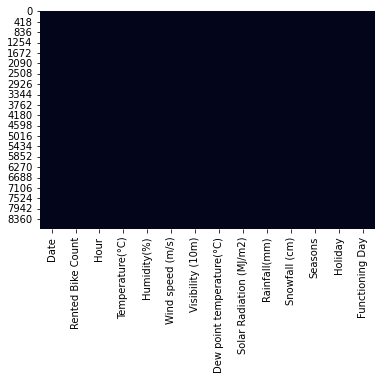

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(bk_data.isnull(), cbar=False);

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* There is no null values.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Date has object data type it should be datetime data type.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(f'Features: {bk_data.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [11]:
# Dataset Describe
bk_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,11.50,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,11.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,17.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,23.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


### Variables Description 

*   **Date** - Date(year-month-day)
*   **Rented_Bike_Count** - Count of bikes rented at each hour
*   **Hour** - Hour of the day(0-23)
*   **Temperature** - Temperature for the day
*   **Humidity** - Humidity Measure
*   **Windspeed** - Windspeed
*   **Visibility** - Visibility Measure
*   **Dew point temperature** - Dew Point Measure
*   **Solar radiation** - Solar Radiation Measure
*   **Rainfall** - Rainfall in mm
*   **Snowfall** - Snowfall in cm
*   **Seasons** - Season Name
*   **Holiday** - Whether Holiday or Not
*   **Functional Day** - Functional Day or Not

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
# bk_data.nunique()
for i in bk_data.columns.tolist():
  print(f"No. of unique values in {i} is {bk_data[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
#converting few names for convenience
df = bk_data.copy()   #keeping orginla data safe
df.rename({"Temperature(°C)": "Temperature",  
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",  
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},  
                axis = "columns", inplace = True) 

In [14]:
print(f'updated columns: {df.columns.to_list()}')

updated columns: ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day']


In [15]:
#changing date data type
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [16]:
#Extracting month from date column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['Day'] = df['Date'].dt.day_name()

#Extracting year
df['Year'] = df['Date'].dt.year

In [17]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)

In [18]:
# Functioning_Day mean, median and sum
df.groupby('Functioning_Day').agg(['mean','median','sum']).T

Functioning_Day                     No         Yes
Rented_Bike_Count     mean        0.00      729.16
                      median      0.00      542.00
                      sum         0.00  6172314.00
Hour                  mean       11.30       11.51
                      median     11.00       12.00
                      sum      3333.00    97407.00
Temperature           mean       16.09       12.77
                      median     16.30       13.50
                      sum      4747.40   108107.00
Humidity              mean       60.49       58.15
                      median     62.00       57.00
                      sum     17846.00   492216.00
Wind_speed            mean        1.70        1.73
                      median      1.50        1.50
                      sum       500.60    14609.60
Visibility            mean     1521.54     1433.87
                      median   1814.00     1690.00
                      sum    448855.00 12137739.00
Dew_point_temperature mean        7.77        3.94
                      median      7.80        4.70
                      sum      2292.20    33394.40
Solar_Radiation       mean        0.60        0.57
                      median      0.00        0.01
                      sum       178.41     4807.00
Rainfall              mean        0.14        0.15
                      median      0.00        0.00
                      sum        40.20     1262.30
Snowfall              mean        0.00        0.08
                      median      0.00        0.00
                      sum         0.00      657.60
Year                  mean     2018.00     2017.91
                      median   2018.00     2018.00
                      sum    595310.00 17081626.00

In [19]:
#finding mean, median and sum based on seasons
df.groupby('Seasons').agg(['mean','median','sum']).T

Seasons                          Autumn     Spring     Summer     Winter
Rented_Bike_Count     mean       819.60     730.03    1034.07     225.54
                      median     763.50     583.00     905.50     203.00
                      sum    1790002.00 1611909.00 2283234.00  487169.00
Hour                  mean        11.50      11.50      11.50      11.50
                      median      11.50      11.50      11.50      11.50
                      sum      25116.00   25392.00   25392.00   24840.00
Temperature           mean        14.12      13.05      26.58      -2.54
                      median      13.85      13.30      26.60      -2.20
                      sum      30839.90   28807.10   58694.80   -5487.40
Humidity              mean        59.23      58.78      64.98      49.74
                      median      59.00      58.00      65.00      47.00
                      sum     129355.00  129779.00  143479.00  107449.00
Wind_speed            mean         1.49       1.87       1.61       1.92
                      median       1.30       1.70       1.50       1.70
                      sum       3264.50    4139.10    3553.60    4153.00
Visibility            mean      1560.75    1240.36    1501.75    1445.99
                      median    1900.00    1307.50    1740.50    1762.00
                      sum    3408683.00 2738725.00 3315854.00 3123332.00
Dew_point_temperature mean         5.50       4.12      18.75     -12.42
                      median       5.50       4.60      20.00     -13.00
                      sum      12009.20    9097.10   41400.30  -26820.00
Solar_Radiation       mean         0.52       0.69       0.76       0.30
                      median       0.00       0.06       0.16       0.00
                      sum       1139.65    1520.84    1680.85     644.07
Rainfall              mean         0.12       0.18       0.25       0.03
                      median       0.00       0.00       0.00       0.00
                      sum        268.10     403.80     559.70      70.90
Snowfall              mean         0.06       0.00       0.00       0.25
                      median       0.00       0.00       0.00       0.00
                      sum        123.00       0.00       0.00     534.60
Year                  mean      2018.00    2018.00    2018.00    2017.66
                      median    2018.00    2018.00    2018.00    2018.00
                      sum    4407312.00 4455744.00 4455744.00 4358136.00

In [20]:
#finding sum, mean and median based on holiday
df.groupby('Holiday').agg(['mean','median','sum']).T

Holiday                        Holiday  No Holiday
Rented_Bike_Count     mean      499.76      715.23
                      median    240.00      524.50
                      sum    215895.00  5956419.00
Hour                  mean       11.50       11.50
                      median     11.50       11.50
                      sum      4968.00    95772.00
Temperature           mean        9.95       13.04
                      median      8.65       13.85
                      sum      4298.30   108556.10
Humidity              mean       53.73       58.46
                      median     53.00       57.00
                      sum     23212.00   486850.00
Wind_speed            mean        1.83        1.72
                      median      1.50        1.50
                      sum       790.40    14319.80
Visibility            mean     1521.68     1432.42
                      median   1942.00     1680.00
                      sum    657366.00 11929228.00
Dew_point_temperature mean        0.25        4.27
                      median      3.25        5.30
                      sum       106.20    35580.40
Solar_Radiation       mean        0.55        0.57
                      median      0.00        0.01
                      sum       237.49     4747.92
Rainfall              mean        0.08        0.15
                      median      0.00        0.00
                      sum        33.70     1268.80
Snowfall              mean        0.05        0.08
                      median      0.00        0.00
                      sum        22.00      635.60
Year                  mean     2017.78     2017.92
                      median   2018.00     2018.00
                      sum    871680.00 16805256.00

In [21]:
#finding sum, mean and median based on Month
df.groupby('Month').agg(['mean','median','sum']).T

Month                               Apr        Aug        Dec        Feb  \
Rented_Bike_Count     mean       772.53     825.52     419.05     393.02   
                      median     651.00     691.00     246.50     283.50   
                      sum     556219.00  614190.00  311771.00  264112.00   
Hour                  mean        11.50      11.50      11.50      11.50   
                      median      11.50      11.50      11.50      11.50   
                      sum       8280.00    8556.00    8556.00    7728.00   
Temperature           mean        13.71      21.26       2.85       6.48   
                      median      13.70      24.35      -0.25       3.30   
                      sum       9872.10   15816.80    2117.00    4357.50   
Humidity              mean        53.63      63.00      55.51      51.79   
                      median      52.00      61.00      54.00      50.00   
                      sum      38614.00   46871.00   41302.00   34800.00   
Wind_speed            mean         1.85       1.68       1.66       1.84   
                      median       1.70       1.60       1.40       1.60   
                      sum       1333.90    1247.80    1235.60    1235.40   
Visibility            mean      1440.53    1658.04    1394.52    1451.80   
                      median    1653.50    1945.00    1789.00    1636.00   
                      sum    1037184.00 1233584.00 1037523.00  975610.00   
Dew_point_temperature mean         3.19      13.17      -5.96      -3.83   
                      median       3.65      18.00      -6.10      -6.90   
                      sum       2296.00    9798.40   -4433.80   -2575.20   
Solar_Radiation       mean         0.73       0.61       0.35       0.51   
                      median       0.07       0.03       0.00       0.00   
                      sum        528.24     450.34     256.87     343.27   
Rainfall              mean         0.15       0.32       0.09       0.15   
                      median       0.00       0.00       0.00       0.00   
                      sum        107.70     241.50      63.80     100.60   
Snowfall              mean         0.00       0.01       0.30       0.07   
                      median       0.00       0.00       0.00       0.00   
                      sum          0.00       4.50     224.50      44.70   
Year                  mean      2017.97    2017.97    2017.35    2017.96   
                      median    2018.00    2018.00    2017.00    2018.00   
                      sum    1452936.00 1501368.00 1500912.00 1356072.00   

Month                               Jan        Jul        Jun        Mar  \
Rented_Bike_Count     mean       386.08     929.22     981.57     611.61   
                      median     215.50     762.50     883.00     505.00   
                      sum     287244.00  691339.00  706728.00  455037.00   
Hour                  mean        11.50      11.50      11.50      11.50   
                      median      11.50      11.50      11.50      11.50   
                      sum       8556.00    8556.00    8280.00    8556.00   
Temperature           mean         2.72      23.13      19.00      11.44   
                      median       0.55      27.35      21.75      10.70   
                      sum       2025.80   17205.30   13678.70    8508.90   
Humidity              mean        52.93      60.59      65.64      59.83   
                      median      51.00      59.00      67.00      59.00   
                      sum      39381.00   45076.00   47259.00   44513.00   
Wind_speed            mean         1.81       1.66       1.69       1.91   
                      median       1.60       1.60       1.50       1.70   
                      sum       1348.90    1238.70    1220.10    1423.90   
Visibility            mean      1392.81    1527.46    1196.53    1241.91   
                      median    1742.00    1672.00    1148.50    1302.00   
                      sum    1036252.00 1136429

In [22]:
#finding mean,sum and median based on Year
df.groupby('Year').agg(['mean','median','sum']).T

Year                              2017        2018
Rented_Bike_Count     mean      249.10      746.88
                      median    236.50      586.00
                      sum    185330.00  5986984.00
Hour                  mean       11.50       11.50
                      median     11.50       11.50
                      sum      8556.00    92184.00
Temperature           mean       -1.93       14.26
                      median     -1.90       15.60
                      sum     -1435.00   114289.40
Humidity              mean       55.83       58.45
                      median     53.00       58.00
                      sum     41534.00   468528.00
Wind_speed            mean        1.74        1.72
                      median      1.45        1.50
                      sum      1292.90    13817.30
Visibility            mean     1332.24     1446.53
                      median   1683.00     1699.00
                      sum    991189.00 11595405.00
Dew_point_temperature mean      -10.34        5.41
                      median    -10.50        6.90
                      sum     -7696.30    43382.90
Solar_Radiation       mean        0.20        0.60
                      median      0.00        0.02
                      sum       151.69     4833.72
Rainfall              mean        0.05        0.16
                      median      0.00        0.00
                      sum        34.80     1267.70
Snowfall              mean        0.37        0.05
                      median      0.00        0.00
                      sum       276.00      381.60

In [23]:
#finding mean,sum and median based on Day
df.groupby('Day').agg(['mean','median','sum']).T

Day                              Friday     Monday   Saturday     Sunday  \
Rented_Bike_Count     mean       734.45     719.64     730.35     615.97   
                      median     547.00     521.00     528.00     401.50   
                      sum     898966.00  863563.00  911475.00  798295.00   
Hour                  mean        11.50      11.50      11.50      11.50   
                      median      11.50      11.50      11.50      11.50   
                      sum      14076.00   13800.00   14352.00   14904.00   
Temperature           mean        13.43      13.15      12.65      12.64   
                      median      16.05      12.75      12.60      13.80   
                      sum      16442.10   15783.20   15782.40   16375.60   
Humidity              mean        59.52      59.27      56.45      57.64   
                      median      61.00      57.00      56.00      57.00   
                      sum      72853.00   71126.00   70453.00   74699.00   
Wind_speed            mean         1.65       1.71       1.76       1.62   
                      median       1.50       1.50       1.60       1.40   
                      sum       2019.70    2051.70    2198.50    2097.40   
Visibility            mean      1397.73    1338.92    1507.13    1426.33   
                      median    1593.50    1547.00    1821.00    1614.50   
                      sum    1710826.00 1606702.00 1880903.00 1848518.00   
Dew_point_temperature mean         4.87       4.75       3.31       3.65   
                      median       6.50       5.00       4.45       3.50   
                      sum       5956.90    5701.80    4129.70    4729.80   
Solar_Radiation       mean         0.56       0.58       0.63       0.54   
                      median       0.01       0.02       0.01       0.01   
                      sum        691.10     696.92     780.61     695.78   
Rainfall              mean         0.11       0.10       0.08       0.16   
                      median       0.00       0.00       0.00       0.00   
                      sum        137.70     114.10     106.00     208.20   
Snowfall              mean         0.05       0.07       0.08       0.04   
                      median       0.00       0.00       0.00       0.00   
                      sum         64.90      87.60      96.10      55.70   
Year                  mean      2017.92    2017.94    2017.92    2017.89   
                      median    2018.00    2018.00    2018.00    2018.00   
                      sum    2469936.00 2421528.00 2518368.00 2615184.00   

Day                            Thursday    Tuesday  Wednesday  
Rented_Bike_Count     mean       743.80     678.36     714.52  
                      median     579.00     481.00     495.50  
                      sum     928267.00  862877.00  908871.00  
Hour                  mean        11.50      11.50      11.50  
                      median      11.50      11.50      11.50  
                      sum      14352.00   14628.00   14628.00  
Temperature           mean        13.23      12.75      12.37  
                      median      15.05      13.30      13.30  
                      sum      16516.70   16217.70   15736.70  
Humidity              mean        58.21      56.61      59.97  
                      median      57.00      55.00      59.00  
                      sum      72643.00   72008.00   76280.00  
Wind_speed            mean         1.72       1.73       1.89  
                      median       1.50       1.50       1.70  
                      sum       2141.40    2195.40    2406.10  
Visibility            mean      1472.19    1494.94    1415.72  
                      median    1695.00    1809.00    1665.00  
                      sum    1837294.00 1901558.00 1800793.00  
Dew_point_temperature mean         4.44       3.58       3.99  
                      median       6.20       5.70       4.80  
                      sum       5539.50    4554.50    5074.40  
Solar_R

In [24]:
#Weekend count
weekend = df.groupby('Day')['Rented_Bike_Count'].sum().reset_index()
chutti = weekend[(weekend['Day'] == 'Saturday') | (weekend['Day'] == 'Sunday')]
chutti

,Day,Rented_Bike_Count
2,Saturday,911475
3,Sunday,798295


In [25]:
#Working day count
workingday = df.groupby('Day')['Rented_Bike_Count'].sum().reset_index()
office = workingday[(workingday['Day'] != 'Saturday') & (workingday['Day'] != 'Sunday')]
office

,Day,Rented_Bike_Count
0,Friday,898966
1,Monday,863563
4,Thursday,928267
5,Tuesday,862877
6,Wednesday,908871


In [26]:
#checking total count of working day vs weekend
d = office['Rented_Bike_Count'].sum() > chutti['Rented_Bike_Count'].sum()
print(f' Is it true that total Rented_Bike_Count is more on working day? {d}')

 Is it true that total Rented_Bike_Count is more on working day? True


In [27]:
# Converting day of weeks in Two variable from Monaday to Friday in workingdays and Saturday and Sunday to Weekend
df['Week'] = df['Day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Working Day')

In [28]:
#finding relation/trend of hour with rented bike count(time series analysis)
df.groupby('Hour')['Rented_Bike_Count'].sum().reset_index().sort_values('Rented_Bike_Count', ascending = False)

,Hour,Rented_Bike_Count
18,18,548568
19,19,436229
17,17,415556
20,20,390172
21,21,376479
8,8,370731
16,16,339677
22,22,336821
15,15,302653
14,14,276971


In [29]:
#converting hour into morning 0-12 afternoon 12-6 and night after 6pm or 18
df['Time_Period'] = df['Hour'].apply(lambda x:'Morning'  if x < 12 else 'Afternoon' if (x >=12) and (x < 18) else 'Night')

In [30]:
#checking bike demand based on time period of the day
df.groupby('Time_Period')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)

,Time_Period,Rented_Bike_Count,Avg_Rented_Bike_Count,Count
2,Night,2333230,1065.40,2190
1,Morning,1981296,452.35,4380
0,Afternoon,1857788,848.31,2190


In [31]:
#finding effect of visibility on rented bike count
df_visibility = df.groupby('Visibility')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)
df_visibility[:10]

,Visibility,Rented_Bike_Count,Avg_Rented_Bike_Count,Count
1788,2000,1836690,818.12,2245
1783,1995,26276,772.82,34
1777,1989,22383,799.39,28
1775,1987,21544,936.70,23
1780,1992,21405,823.27,26
1773,1985,19848,708.86,28
1774,1986,19835,1043.95,19
1784,1996,19547,723.96,27
1786,1998,19518,780.72,25
1778,1990,19495,847.61,23


In [32]:
df_humidity = df.groupby('Humidity')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)
df_humidity[:10]

,Humidity,Rented_Bike_Count,Avg_Rented_Bike_Count,Count
34,43,141773,864.47,164
44,53,140725,813.44,173
38,47,138105,885.29,156
47,56,134711,858.03,157
42,51,131966,851.39,155
43,52,130054,867.03,150
46,55,129240,891.31,145
35,44,126969,857.90,148
36,45,126234,888.97,142
45,54,123762,819.62,151


* **skew** = measure of asymmetry of a distribution

* **kurtosis** = quantify shape of a distribution

In [33]:
#finding skew and kurtosis for checking abnormality in data
df.agg(['skew', 'kurtosis']).T          #Aggregate using one or more operations over the specified axis

,skew,kurtosis
Rented_Bike_Count,1.15,0.85
Hour,0.00,-1.20
Temperature,-0.20,-0.84
Humidity,0.06,-0.80
Wind_speed,0.89,0.73
Visibility,-0.70,-0.96
Dew_point_temperature,-0.37,-0.76
Solar_Radiation,1.50,1.13
Rainfall,14.53,284.99
Snowfall,8.44,93.80


### What all manipulations have you done and insights you found?

In order to start the analysis, I first started by making data more consistent i.e., I first changed column name to more readable format. Later I converted incorrect data type of date feature into datetime data type and then extracted month, year and day from date and then deleted the date feature. Based on the categorial feaure I calulated average and median for numerical values to undertand how it impact other features. Then finally I tried to find how bike demand is affected based on other features like visibility and humidity. I have also created two different columns, one by dividing day of week into working and weekend to check how bike demand was affected and then based on hour i divided enitre column in different time period to understand its affect.

▶ Insights from analysis:
*  People tends to use bike when company is functional i.e., for non functioning day bike rented was zero.
*  Demand for bike is affected if there is holiday.
*  Visibility shows linear relation with bike demand.
*  People prefer bike when there is moderate humidity 30-55.
*  With change in seasons, demand for bike also changes. Maximum when summer and minium when winter.

Visualization will show more effect with results.

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [34]:
#storing numerical feature in separate variable
#Return a subset of the DataFrame’s columns based on the column dtypes
num_feature = df.select_dtypes(exclude='object')    
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Year']


In [35]:
#storing categorial feature in separate variable
#Pandas isin() method is used to filter data frames using boolean value true of false
#Tilde sign (~)works as a negation operator i.e reverse true to false and false to true
cat_feature = df.loc[:,  ~df.columns.isin(num_feature.columns.to_list())] 
print(f'Categorical feature : {cat_feature.columns.to_list()}')              

Categorical feature : ['Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Week', 'Time_Period']


In [36]:
#checking outliers using box plot
def box_plot(df,feature):
  for i,col in enumerate(feature.columns) :
    plt.figure(figsize = (20,25))
    if df[col].dtypes == 'object':
      plt.subplot(4,2,i+1);
      sns.boxplot(x=df[col],y=df["Rented_Bike_Count"]);
      plt.xticks(fontsize = 18, rotation = 90);
    else:
      plt.subplot(6,2,i+1);
      sns.boxplot(df[col]);
    plt.tight_layout();

###Univariate

In [37]:
#analysing numerical value using density plot with mean and median
#Rose-Red Color indicate mean of data
#Cyan indicate median of data
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

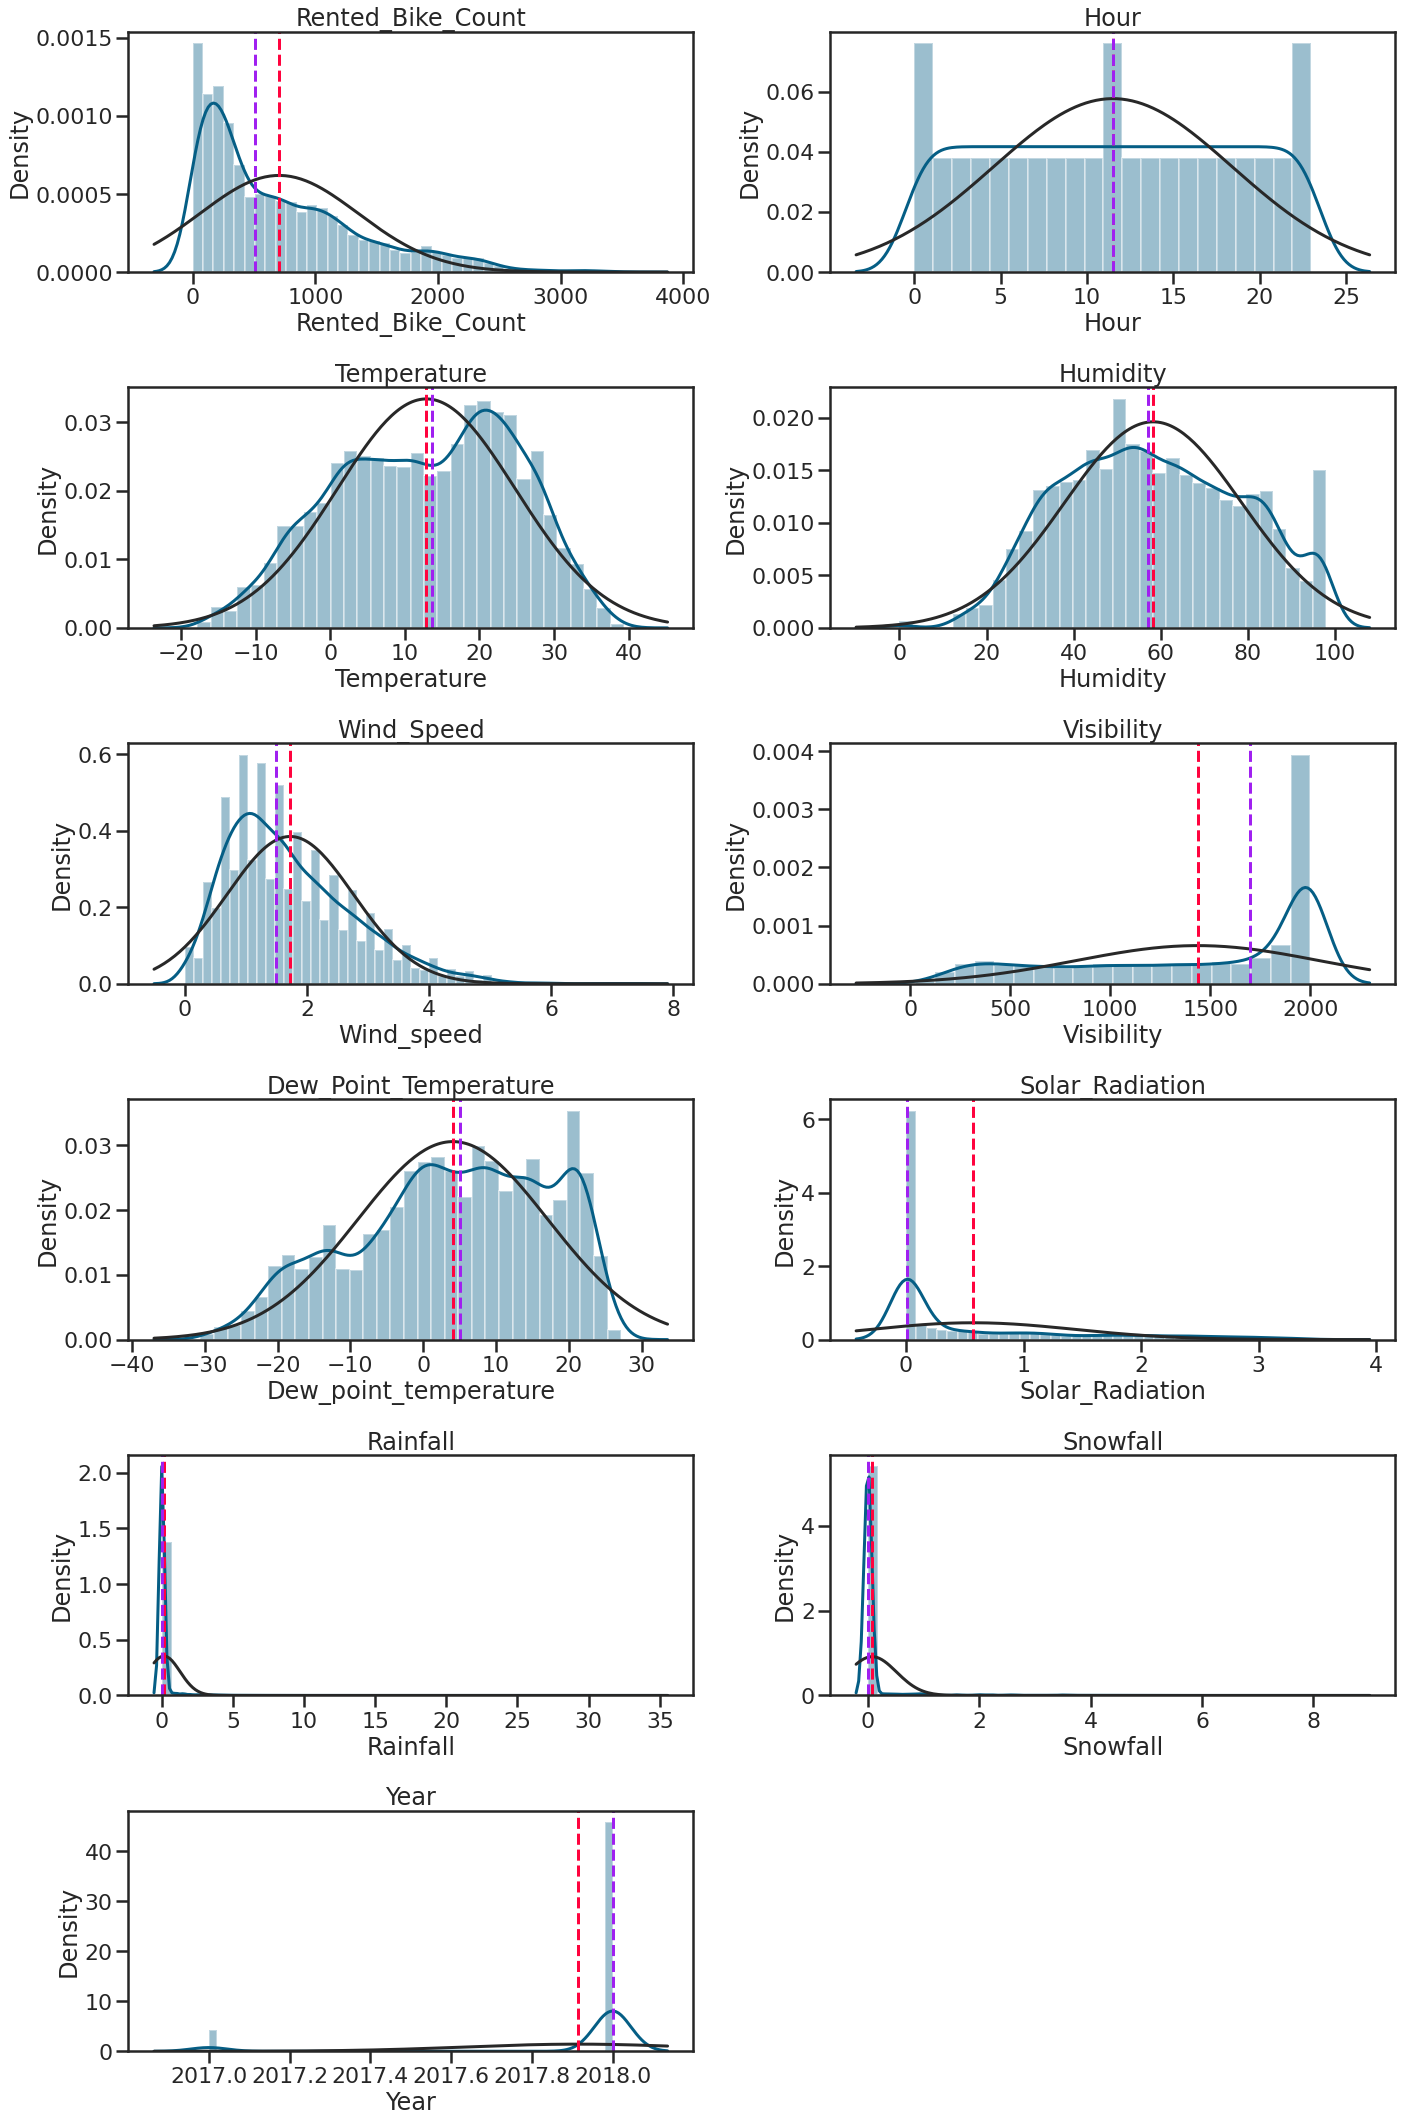

In [38]:
#graph to analyse distribution of different numerical features
density_plot(df,num_feature)

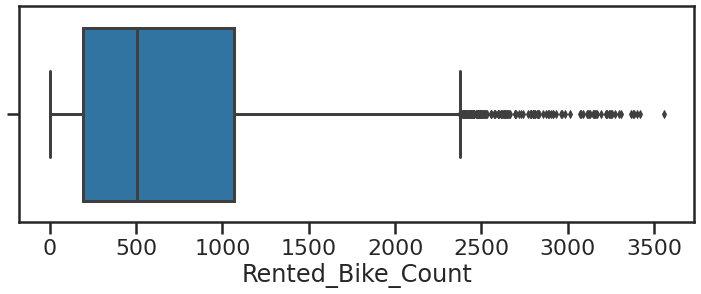

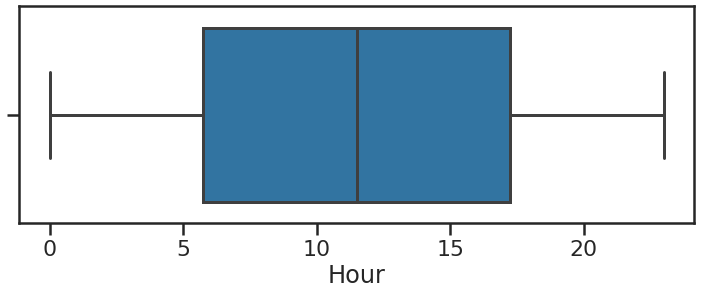

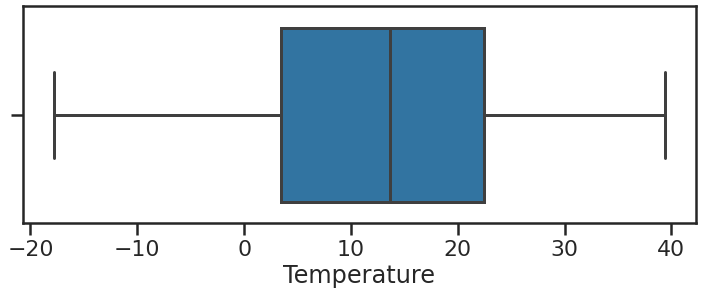

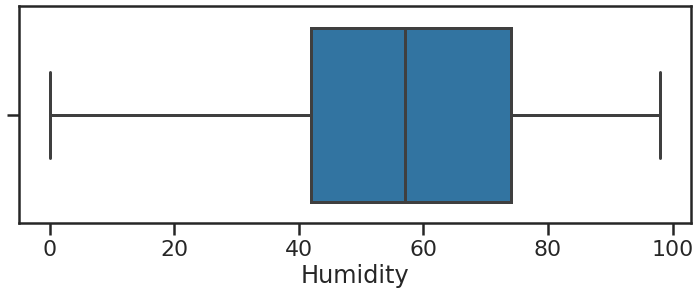

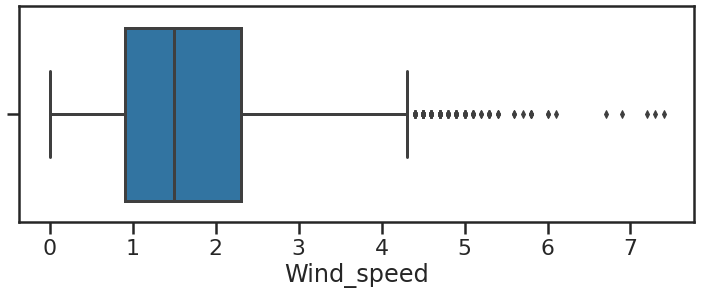

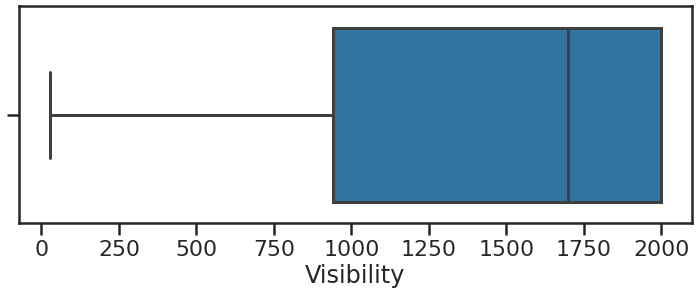

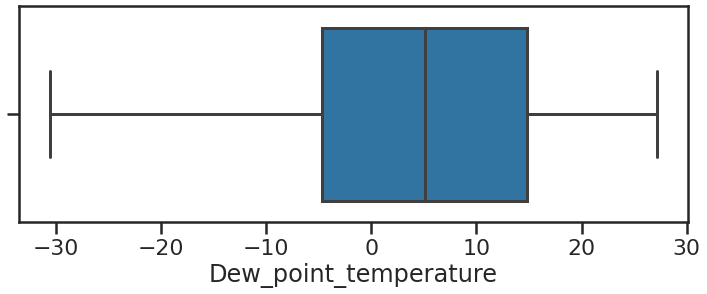

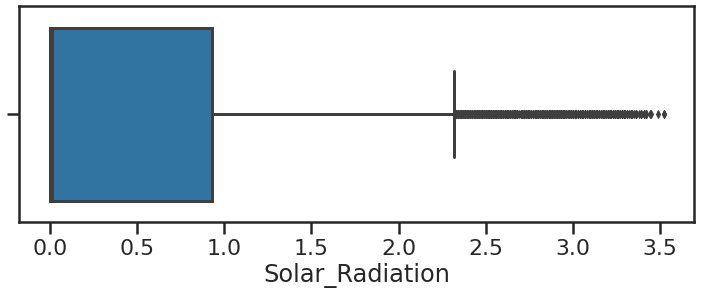

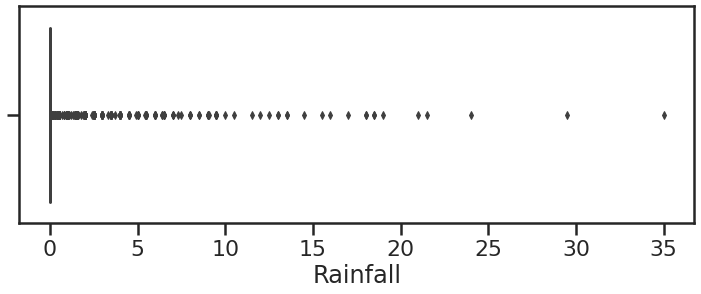

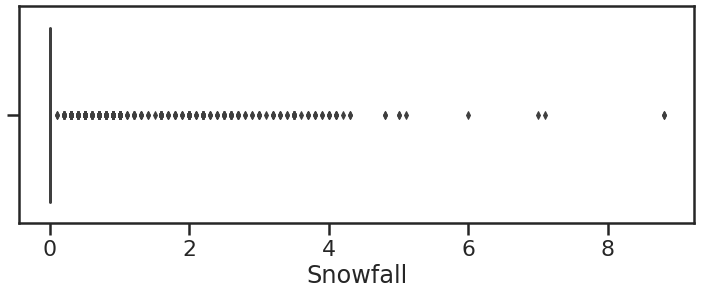

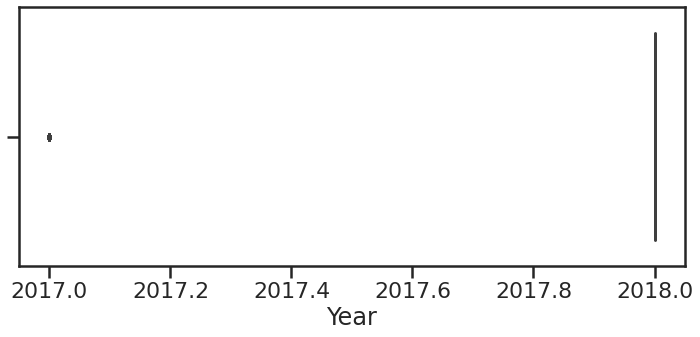

In [39]:
#using box plot function checking outliers in numerical features
box_plot(df, num_feature)

#### Chart 1- Understanding the distribution

##### 1. Why did you pick the specific chart?

In order to understand the distribution for each feature, I plotted distplot along with its mean and median. Distplot is shows both histogram and kde plot and is best suited for continous data.

##### 2. What is/are the insight(s) found from the chart?

  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented_Bike_Count**, **Wind_speed**, **Solar Radiation**

  **No Skew**: Mean = Median = Mode : **Hour**, **Temperature**, **Humidity**,**Rainfall**,**Snowfall**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In this context it can not define any business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart 2- Visualization of Outliers

##### 1. Why did you pick the specific chart?

Box plot help in Visualization of outliers, distribution of median.

##### 2. What is/are the insight(s) found from the chart?

* In rented bike count feature there are few points accumulated above maximum range. 
* Feature like snowfall and rainfall show sparse data as there are more number of values which is zero i.e., upto 75 quartile.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot alone can not provide any business impact, plotted only to visulize distribution and understanding of anamolies.

###Bivariate

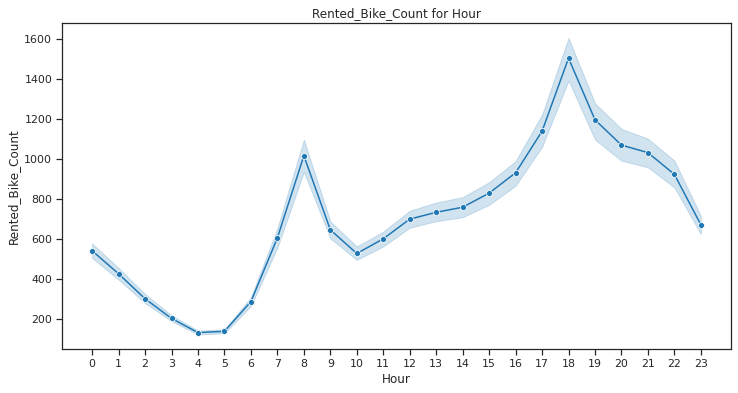

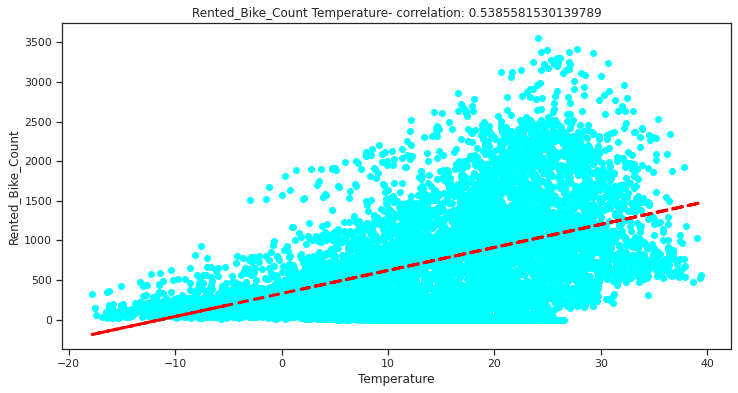

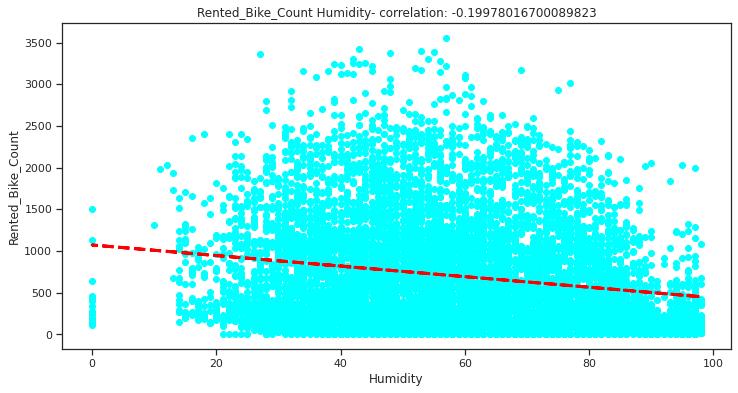

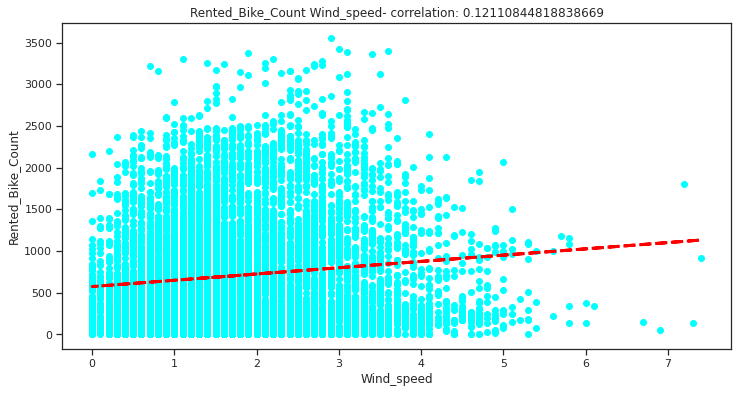

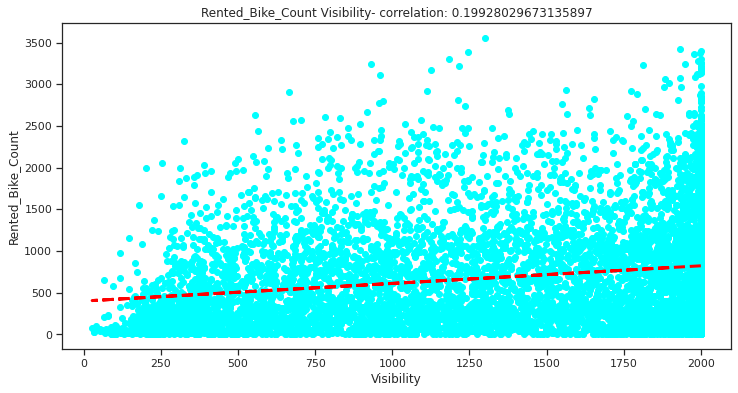

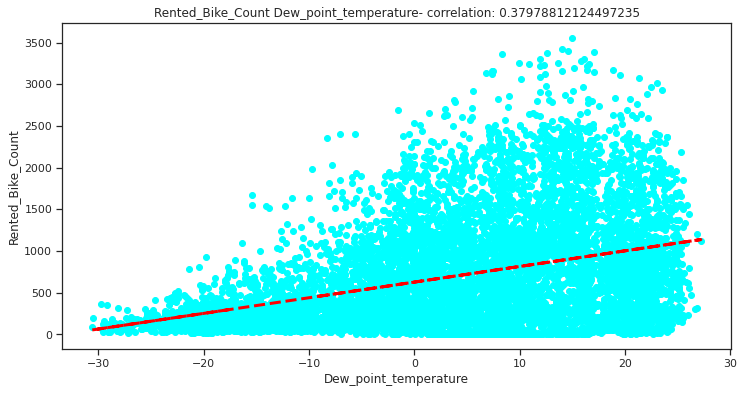

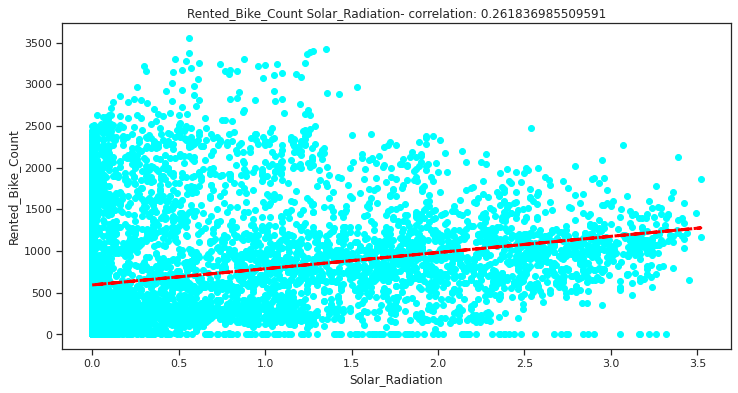

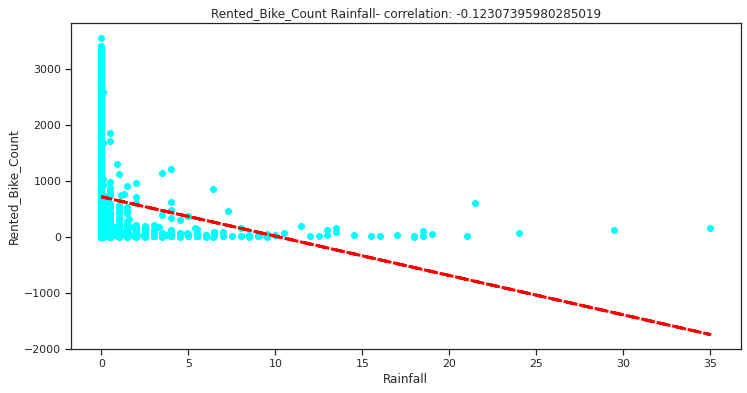

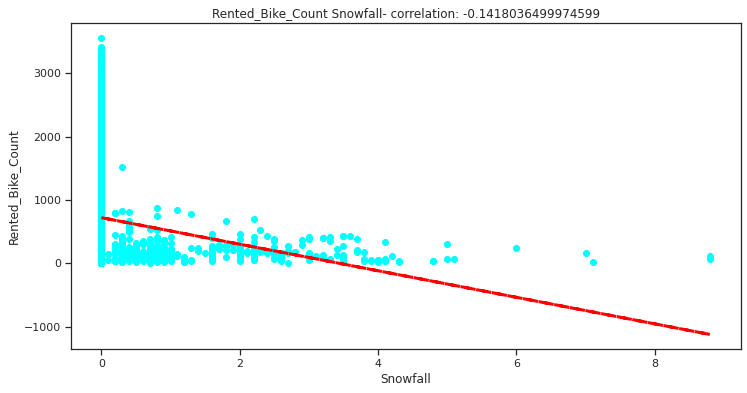

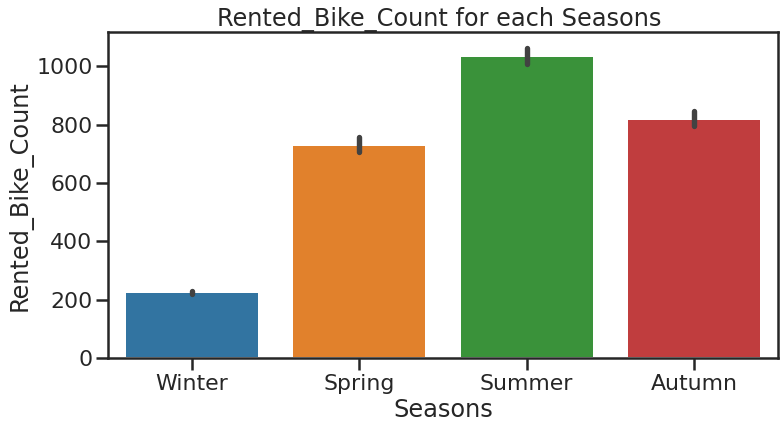

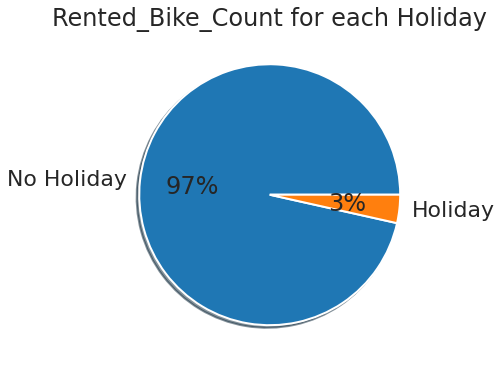

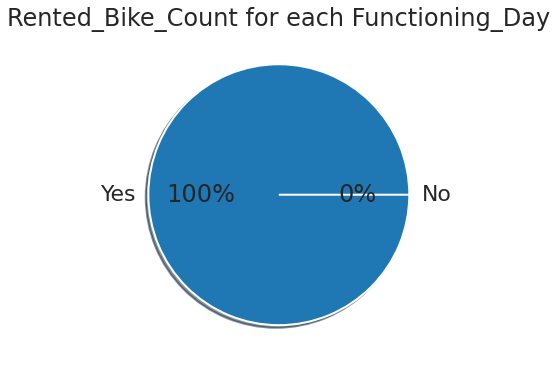

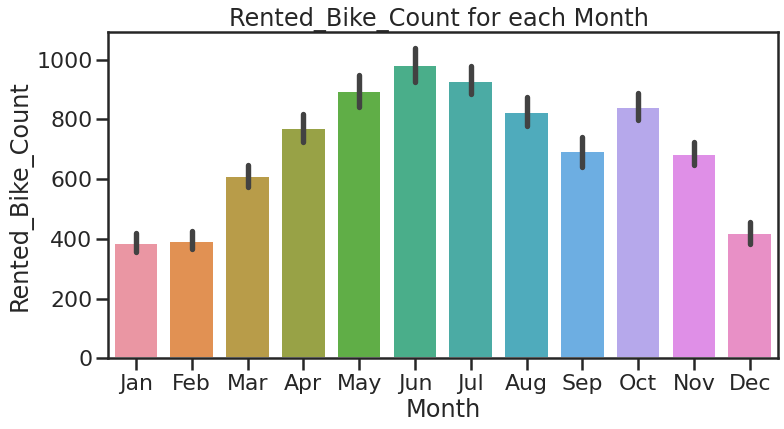

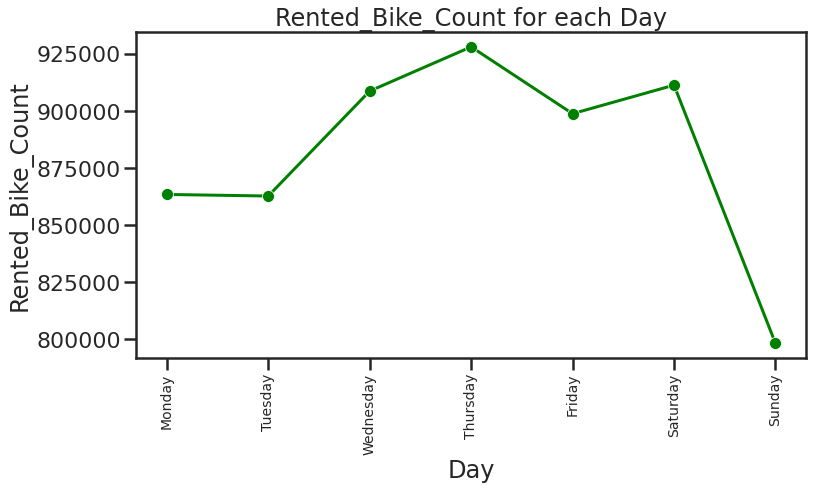

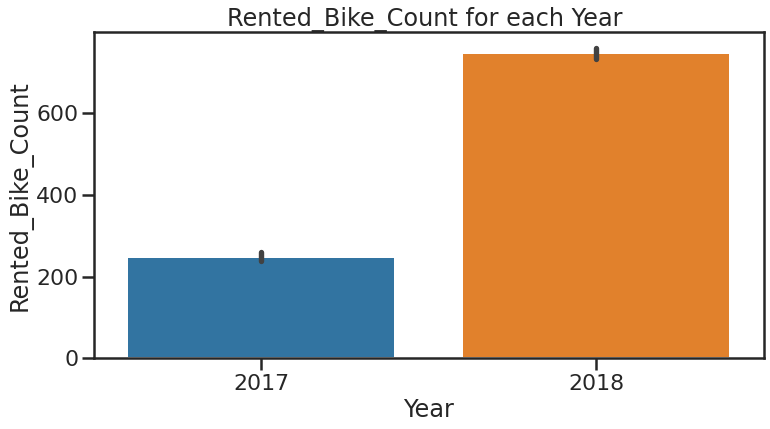

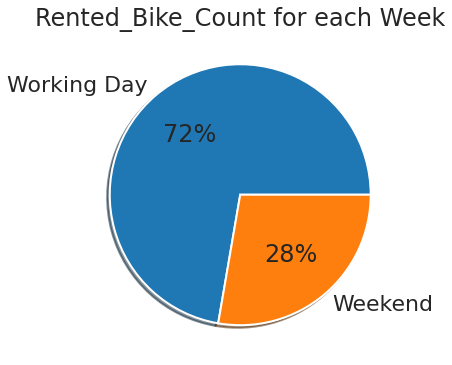

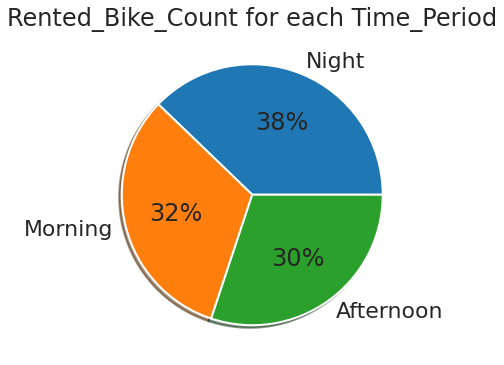

In [40]:
#comparing different feature with bike count 
for i in df.columns:
  if i == 'Rented_Bike_Count':
    pass
  #barplot
  elif i in ['Seasons','Month','Year']:
    sns.set_context('poster');
    plt.figure(figsize=(12,6));
    chart = sns.barplot(x=df[i], y=df["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for each {i} ");
    print('='*120);
  #pie chart
  elif i in ['Holiday','Functioning_Day','Week','Time_Period']:
    grp = df.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    sns.set_context('poster');
    plt.figure(figsize=(12,6));
    palette_color = sns.color_palette('bright');
    chart = plt.pie(grp['Rented_Bike_Count'], labels= grp[i],shadow= True,autopct='%.0f%%');
    plt.title(f"Rented_Bike_Count for each {i}");
    print('='*120);
  #lineplot
  elif i == 'Day':
    workingdays = {'Day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = df.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    new_df = workingday.merge(grp)
    sns.set_context('poster');
    plt.figure(figsize=(12,6));
    chart = sns.lineplot(data= new_df, x=i,y= 'Rented_Bike_Count', marker= 'o', color = 'green');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented_Bike_Count for each {i}");
    print('='*120);
  #lineplot for hour
  elif i == 'Hour' :
    sns.set_context('notebook');
    plt.figure(figsize=(12,6));
    chart = sns.lineplot(x=df[i], y=df["Rented_Bike_Count"],marker= 'o');
    plt.xticks(range(24))
    plt.title(f"Rented_Bike_Count for {i}");
  #scatterplot
  else:
    sns.set_context('notebook');
    fig = plt.figure(figsize=(12, 6));
    ax = fig.gca();
    feature = df[i]
    label = df['Rented_Bike_Count']
    correlation = feature.corr(label)
    chart = plt.scatter(x=feature, y=label,color='cyan');
    plt.xlabel(i);
    plt.ylabel('Rented_Bike_Count');
    ax.set_title('Rented_Bike_Count ' + i + '- correlation: ' + str(correlation));
    z = np.polyfit(df[i], df['Rented_Bike_Count'], 1);
    y_hat = np.poly1d(z)(df[i]);

    plt.plot(df[i], y_hat, "r--", lw=3);
    print('='*120)

  plt.show()

#### Chart - 3 Effect of Hour on Rented Bike Count (Lineplot and Pie chart)

##### 1. Why did you pick the specific chart?

Linetplot - I choose lineplot to plot hour and rented bike count for each hour because it helps in plotting for continous and vizualize the possible trend. Here rented bike count in the plot is represented by mean value and the shaded around the line shows the confidence interval which shows the uncertainity in the mean estimate i.e., it helps to visualize the range of values within which the true mean is likely to fall, based on the sample data. (* Note : The width of the confidence interval is determined by the sample size, the variance of the data, and the desired level of confidence.For example, if the sample size is large and the data are very consistent (i.e. low variance), then the confidence interval will be narrow, indicating that the mean estimate is very precise. On the other hand, if the sample size is small or the data are highly variable, then the confidence interval will be wider, indicating that the mean estimate is less precise.)

Pie chart - In order to show different percentage of rented bike count around different time period of the day - morning (0-12), afternoon(12-18) and night(18-0). Pie chart help in better understanding of different proportion of data.

##### 2. What is/are the insight(s) found from the chart?

Lineplot for hour and rented bike count shows that:
* Demand for bike is more during 8-10 in morning and 18-20 in night.
* Bike demand from midnight start decreasing till 4 in morning then gradually increase and comes at peak in night.

Pie chart for total rented bike count and time period shows:
* 38% of demand was in night, 32% in morning and 30% in afternoon.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hour of the day definetly plays important role for any business. It help in understanding the behaviour of customer engagement and how company should be prepared to deal with the situation.
In this case since the demand is more is more in night and morning specifically to 8-9 and 18-20, stable supply to meet demand during those will increase revenue whereas shortage will cause negative growth.

#### Chart - 4 Effect of different day of week (Lineplot and Pie chart)

##### 1. Why did you pick the specific chart?

Lineplot - Lineplot helps in time series analysis to learn the trend.

Pie chart - As the day of the week was divided into working (Monday-Friday) and weekend (Sat- Sun), pie chart help in understanding the percentage total rented bike count for the two category.

##### 2. What is/are the insight(s) found from the chart?

Lineplot for Day and Total Rented bike count shows:
* There is a increase in demand from mondat to thrusday then it lowers on friday, later increases on satuerday and shows least demand in sunday.

Pie Chart - It shows that 72% bike demand is during working day and 28% bike demand is on weekend.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the activity it is necessary to maintain stable supply for most demanding day as it will directly affect revenue in case of shortage. Based on the demand if company will not fulfill criteria it will not only have negative brand effect but also low retention in customers.

#### Chart - 5 Effect of Month, Season and Year on Rented Bike Count (Barplot)

##### 1. Why did you pick the specific chart?

I used this chart because it helps to compare between different categories.

##### 2. What is/are the insight(s) found from the chart?

Month and rented bike count shows:
* Bike count increase from January till June then there is a small decrease and again rise in October and gradually decrease till December.

Season and rented bike count shows:
* Demand for bike count is more in summer and lower in winters and with season graph it is also justified.

Year and rented bike count:
* There is a increase in demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the above insight it will help in customer retention and growth.

Since data available is only for two year, therefore year itself can not have any much of impact on business, however it shows increase which is a sign of market capture for a new business.

#### Chart - 6 Effect on Functioning day and Holiday (Pie Chart)

##### 1. Why did you pick the specific chart?

Both functioning day and holiday represnt categorial data with binary answers i.e., yes or no and that's why used the pie chart to understand different allocation of each answer.

##### 2. What is/are the insight(s) found from the chart?

Pie chart of Functioning day shows:
* There are 0 rented bike count on non funcitoning day which means to accomplish demand company should focus more on functioning day.

Pie chart of Holiday shows:
* 97% of bikes are rented when there is no holiday and 3% on holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since 100% of the profit are generated on functioning day, company should focus more on increasing functioning hours or day as it will directly generate more traffic for business.

Similarly, holiday always results in reduced foot traffic which can also be seen in the graph how only 3% of the demand is generated on holiday, in order to maintain the profit ratio on holiday slight increase in price could balance profit ratio. Since we do not know exact price point from dataset, it will hard to say what amount to increase and how price affect the demand, will increase in price can lead to negative growth.

#### Chart - 7 Effect of Environment Factors on Rented Bike count (Scatter plot with correlation)

##### 1. Why did you pick the specific chart?

Scatterplot is best when we need to vizualize relationship between two variable.

##### 2. What is/are the insight(s) found from the chart?

* Snowfall and rainfall show negative linear relation with rented bike count.
* Bike demand is more when there is low solar radiaiton.
* When there is high visibility, demand is more.
* Dew point and humidity shows increase in demand when they are present in moderate amount.
* Less windspeed is prefered for maximum demand.
* Average temperature of 20-35 show maximum demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Environmental factors play an important role as the business solely depends upon them for its operations and success.However we can not control these natural environment, therefore based on the demand and how it alter it, company should be alet with wether forecasting to arrange suitable demand based on daily weather.

These natural environment factors can significantly impact the demand for bike rentals by making it less appealing or unsafe to ride a bike.

#### Chart - 8 Box plot for Categorial Feature with respect to Bike Demand


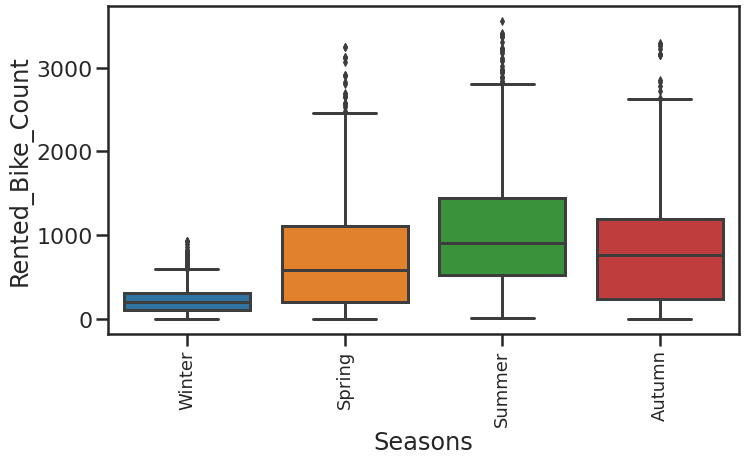

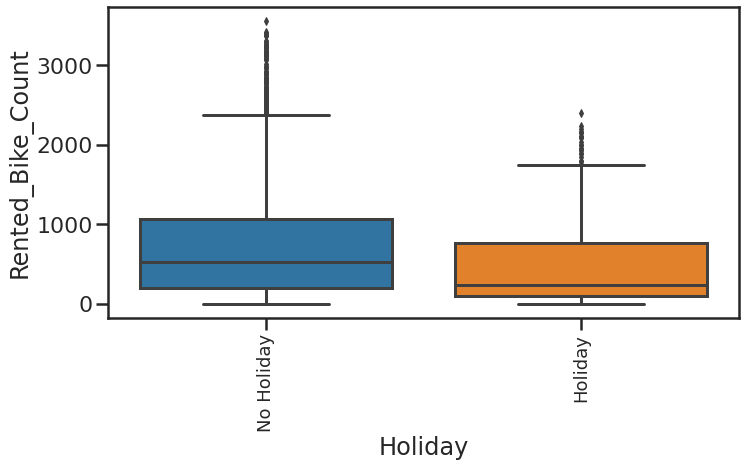

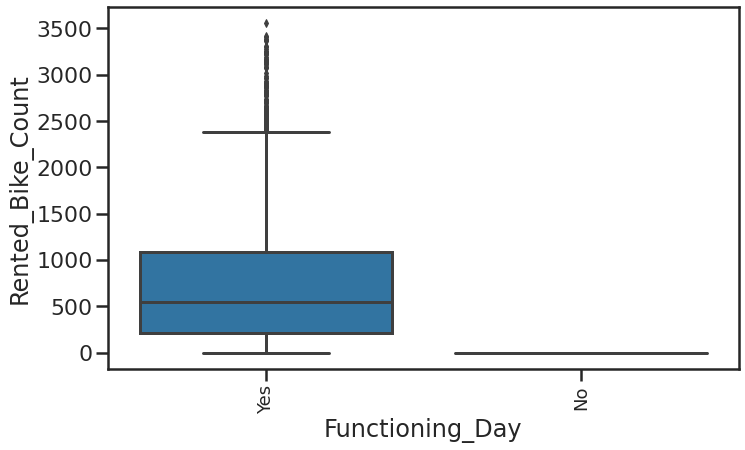

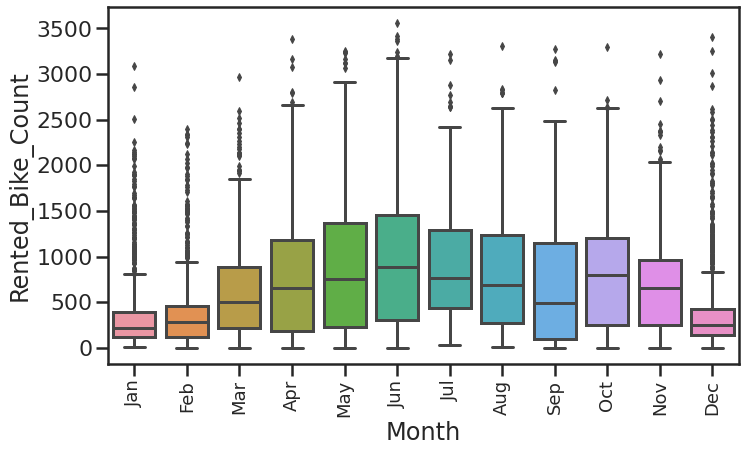

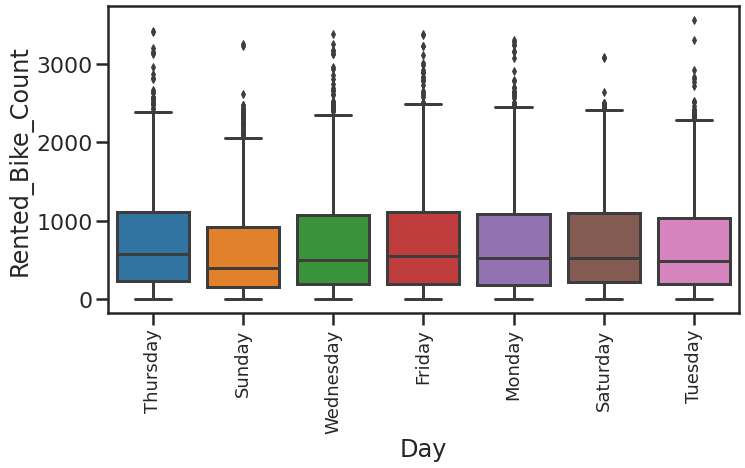

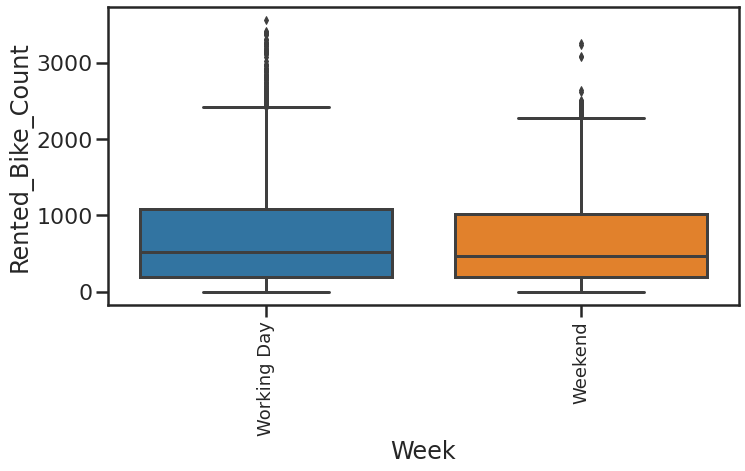

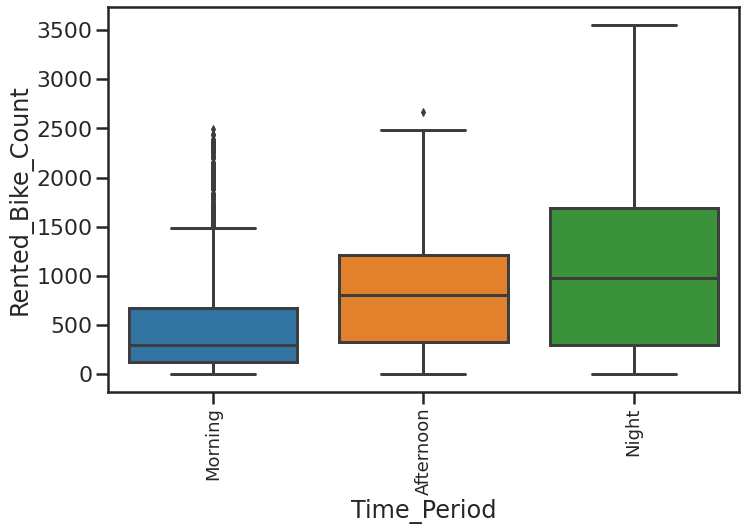

In [41]:
# Chart - 8 visualization code
box_plot(df,cat_feature)

##### 1. Why did you pick the specific chart?

Box plots are helpful in learning about outliers and to determine where the majority of the points land at a glance.

##### 2. What is/are the insight(s) found from the chart?

Few rented bike count are above the maximum point.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot can not show impact on business, used only to learn about distribution.

###Multivariate

#### Chart - 9 Analyzing how rented bike count if affected every Hour with respect to other features.

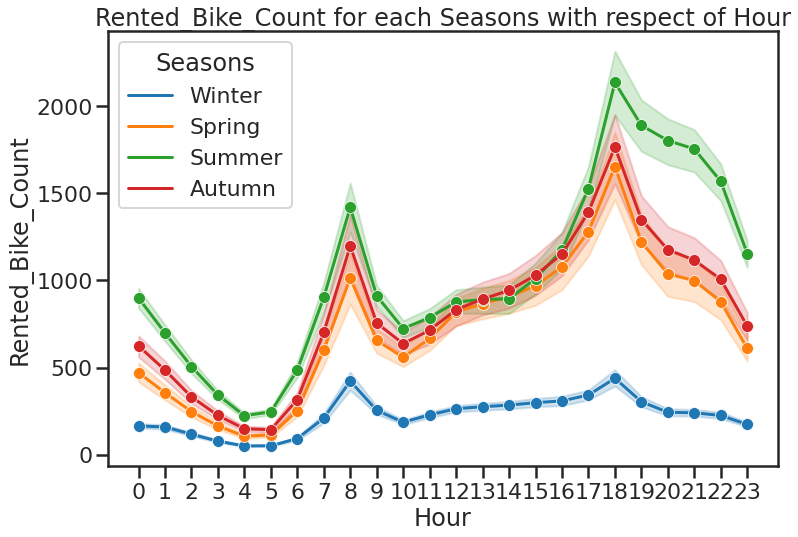

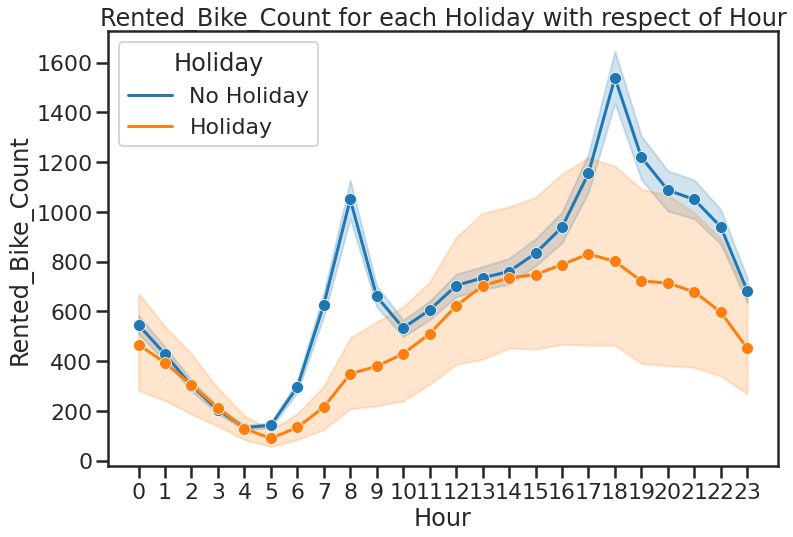

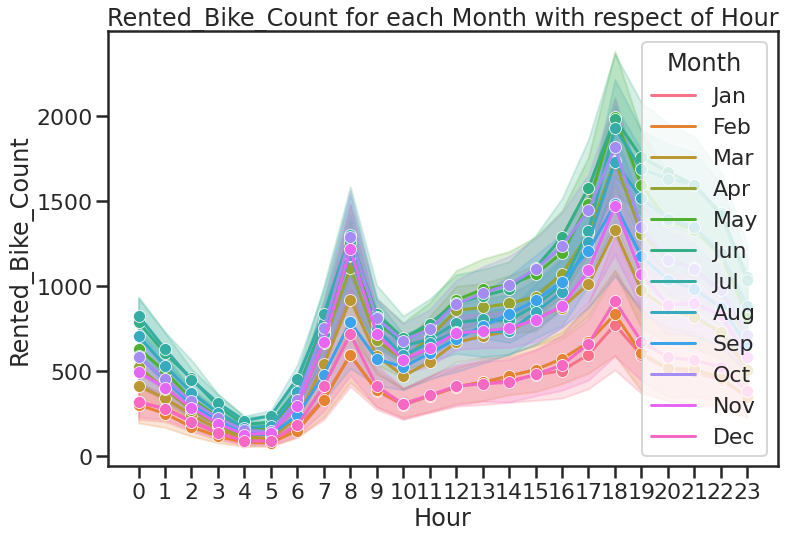

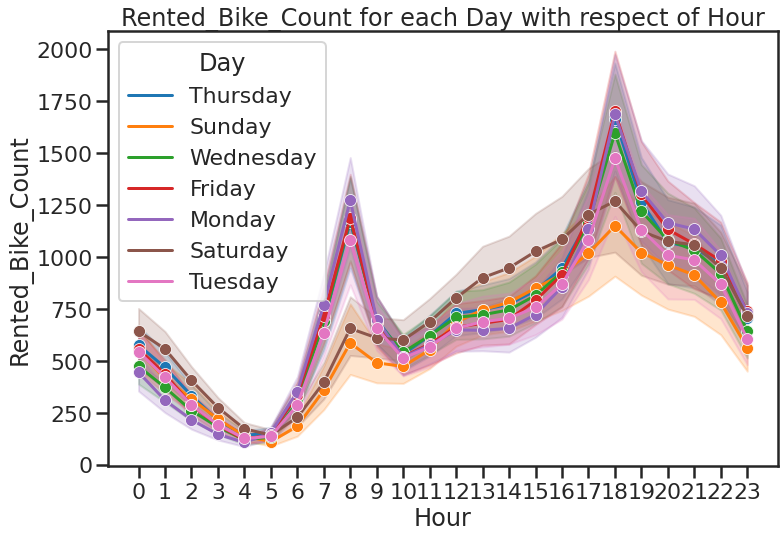

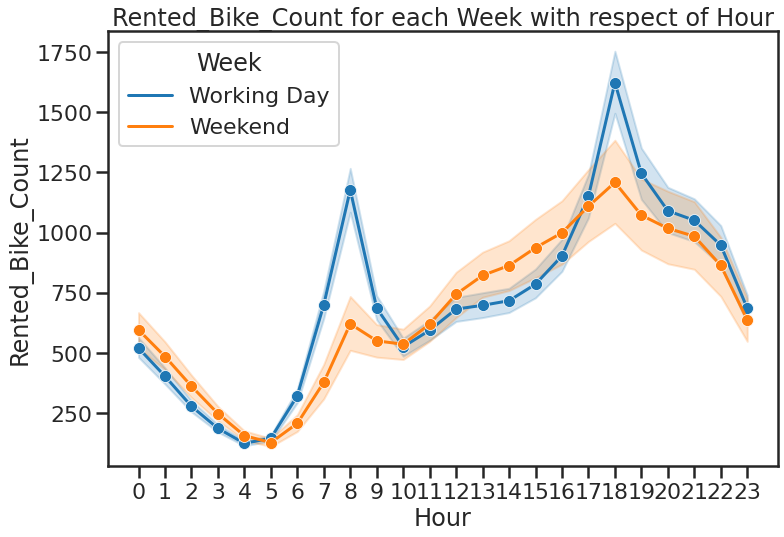

In [42]:
#analysing hour with bike demand with respect to different third value

for i in cat_feature:
  if i in ['Hour','Time_Period','Functioning_Day']:
    pass
  else:
    plt.figure(figsize=(12,8))
    fig = sns.lineplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df[i], marker ='o');
    plt.xticks(range(24));
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  plt.show();

##### 1. Why did you pick the specific chart?

I pick lineplot for comparing different feature based on hue because i was comparing different features based on time.

##### 2. What is/are the insight(s) found from the chart?

Shows maximum demand around 8-9 and 18-20 irrespect of other features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to maintain demand based on the time to generate stable profit.

Based on time period if unable to maintain demand, it will create a chance of new competition.

#### Chart - 10 - Correlation Heatmap

In [43]:
# Correlation Heatmap visualization code
corr = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Year
Rented_Bike_Count,1.00,0.41,0.54,-0.20,0.12,0.20,0.38,0.26,-0.12,-0.14,0.22
Hour,0.41,1.00,0.12,-0.24,0.29,0.10,0.00,0.15,0.01,-0.02,0.00
Temperature,0.54,0.12,1.00,0.16,-0.04,0.03,0.91,0.35,0.05,-0.22,0.38
Humidity,-0.20,-0.24,0.16,1.00,-0.34,-0.54,0.54,-0.46,0.24,0.11,0.04
Wind_speed,0.12,0.29,-0.04,-0.34,1.00,0.17,-0.18,0.33,-0.02,-0.00,-0.00
Visibility,0.20,0.10,0.03,-0.54,0.17,1.00,-0.18,0.15,-0.17,-0.12,0.05
Dew_point_temperature,0.38,0.00,0.91,0.54,-0.18,-0.18,1.00,0.09,0.13,-0.15,0.34
Solar_Radiation,0.26,0.15,0.35,-0.46,0.33,0.15,0.09,1.00,-0.07,-0.07,0.13
Rainfall,-0.12,0.01,0.05,0.24,-0.02,-0.17,0.13,-0.07,1.00,0.01,0.03
Snowfall,-0.14,-0.02,-0.22,0.11,-0.00,-0.12,-0.15,-0.07,0.01,1.00,-0.21


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* Features like **Temperature(°C)** and **Dew point temperature(°C)** show **correlation** of **0.91** and in general, an **absolute correlation coefficient of > 0.7** among two or more predictors indicates the presence of **multicollinearity**.

> ⚡Note: If two variable or features show relationship either in same or opposite direction, then these variables thus show correlation between them.

* **Hour** and **temperature** show positive correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is no difference in the mean number of rented bikes between different hours of the day.
2. There is no relationship between temperature and the number of rented bikes.  
3. There is no difference in the mean number of rented bikes between different seasons.



### Hypothetical Statement - 1
---
There is no difference in the mean number of rented bikes between different hours of the day.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no difference in the mean number of rented bikes between different hours of the day.

* Alternative hypothesis: There is a difference in the mean number of rented bikes between different hours of the day.

* Test type : ANOVA test

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis_H0 = "There is no difference in the mean number of rented bikes \
                      between different hours of the day."
alternative_hypothesis_Ha = "There is a difference in the mean number of rented \
                      bikes between different hours of the day."
# Group the data by hour
data_by_hour = df.groupby('Hour')

# Calculate the mean number of rented bikes for each hour
means = data_by_hour['Rented_Bike_Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_hour['Rented_Bike_Count'].get_group(hour) 
                        for hour in data_by_hour.groups])
# * operator before the list of groups passed to the f_oneway() function, 
# which specifies that the list should be treated as separate arguments rather than as a single argument

# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05: #0.05 is significance threshold value to test 
   print(f"{alternative_hypothesis_Ha} (reject H0(Null Hypothesis))")
else:
   print(f"{null_hypothesis_H0} (fail to reject H0(Null Hypothesis))")

F-statistic: 156.687
p-value: 0.000
There is a difference in the mean number of rented                       bikes between different hours of the day. (reject H0(Null Hypothesis))


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (hours of the day).

### Hypothetical Statement - 2
---
There is no relationship between temperature and the number of rented bikes.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between temperature and the number of rented bikes.
* Alternative hypothesis: There is a relationship between temperature and the number of rented bikes.
* Test Type: Pearson correlation coefficient

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no relationship between temperature and the number of rented bikes."
alternative_hypothesis = "There is a relationship between temperature and the number of rented bikes."

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(df['Temperature'], df['Rented_Bike_Count'])

# Print the result of the test
print(f"Correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

Correlation coefficient: 0.539
p-value: 0.000
There is a relationship between temperature and the number of rented bikes. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient and the p-value to test the statistical significance of the relationship between the number of rented bikes and the temperature. Specifically, I used the pearsonr() function from the scipy.stats library to calculate the Pearson correlation coefficient and the p-value between the Temperature and Rented_Bike_Count columns of the data.

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, and it takes on values between -1 and 1. A value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.

I chose to use the Pearson correlation coefficient and p-value for this null hypothesis because they are suitable for testing the statistical significance of a linear relationship between two continuous variables. In this case, the Temperature column is a continuous variable that can take on any value within a certain range, and the Rented_Bike_Count column is also a continuous variable that can take on any integer value within a certain range.






### Hypothetical Statement - 3
---
There is no difference in the mean number of rented bikes between different seasons.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no difference in the mean number of rented bikes between different seasons.
* Alternative hypothesis: There is a difference in the mean number of rented bikes between different seasons.
* Test Type: ANOVA Test

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no difference in the mean number of rented bikes between different seasons."
alternative_hypothesis = "There is a difference in the mean number of rented bikes between different seasons."

# Group the data by season
data_by_season = df.groupby('Seasons')

# Calculate the mean number of rented bikes for each season
means = data_by_season['Rented_Bike_Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_season['Rented_Bike_Count'].get_group(season)
                         for season in data_by_season.groups])
# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

F-statistic: 776.468
p-value: 0.000
There is a difference in the mean number of rented bikes between different seasons. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups. 

##### Why did you choose the specific statistical test?

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (seasons).

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Day                      0
Year                     0
Week                     0
Time_Period              0
dtype: int64


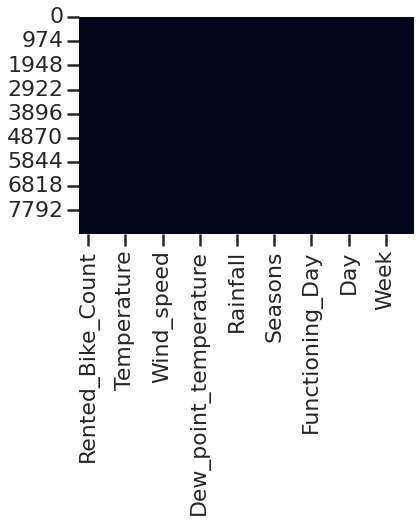

In [229]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, there were no missing values to handle in the given dataset no further manipulation was needed.

### 2. Handling Outliers

In [230]:
# Handling Outliers & Outlier treatments
#since it has two observation for now converting into categorial later will change using onehot encoding
df['Year'] = df.Year.astype('str')
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

#ignoring rainfall and snowfall due to sparsity(upto 75 percentile value was 0
# and this outliers are needed for model to learn)
symmetric_feature = symmetric_feature[:-2]
print("Symmetric Distributed Features : -",symmetric_feature)

Symmetric Distributed Features : - ['Hour', 'Rainfall', 'Snowfall']
Skew Symmetric Distributed Features : - ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']
Symmetric Distributed Features : - ['Hour']


In [231]:
# For Symmetric features defining upper and lower boundry(normally distributed using std and mean)
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [232]:
# Restricting/ capping the data to lower and upper boundry

for feature in symmetric_feature:
  #below lower value then value = lower value
  df.loc[df[feature]<= outlier_treatment(df=df,feature=feature)[1], feature]=outlier_treatment(df=df,feature=feature)[1]
  #above higher value, then value = higher value
  df.loc[df[feature]>= outlier_treatment(df=df,feature=feature)[0], feature]=outlier_treatment(df=df,feature=feature)[0]

In [233]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [234]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

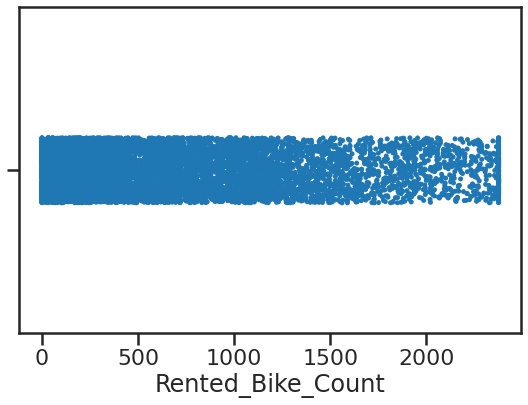

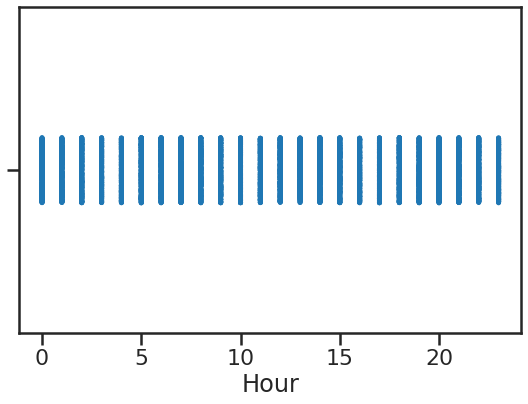

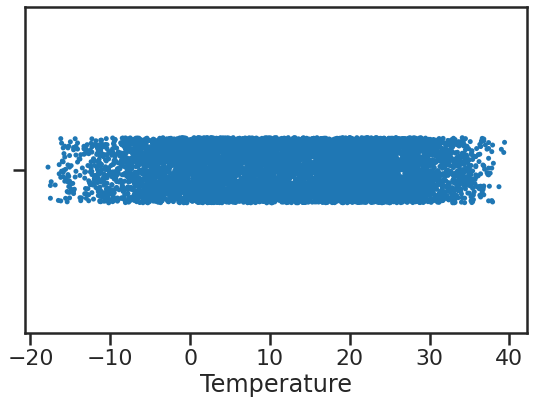

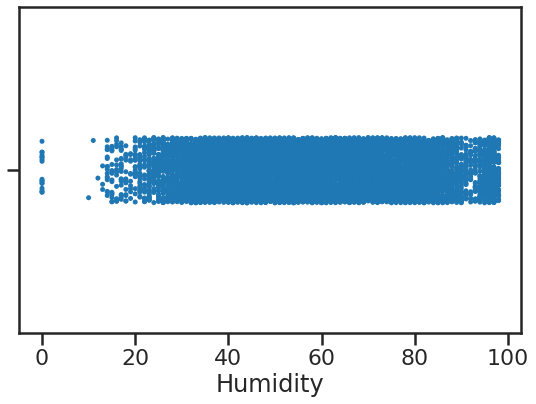

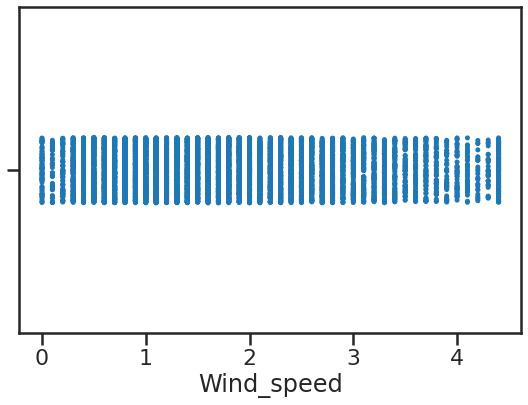

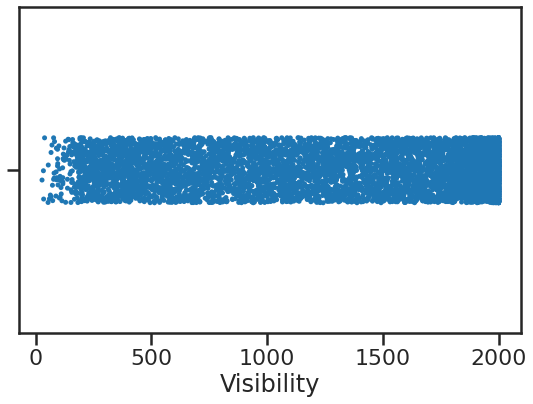

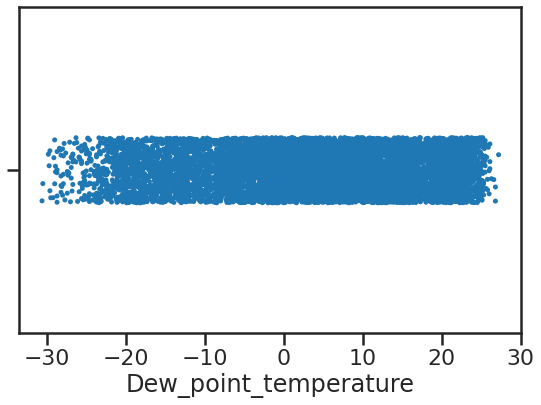

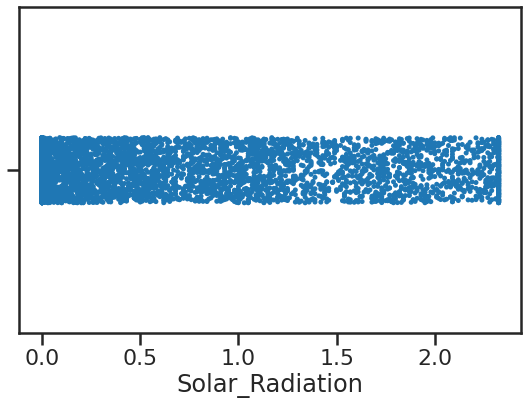

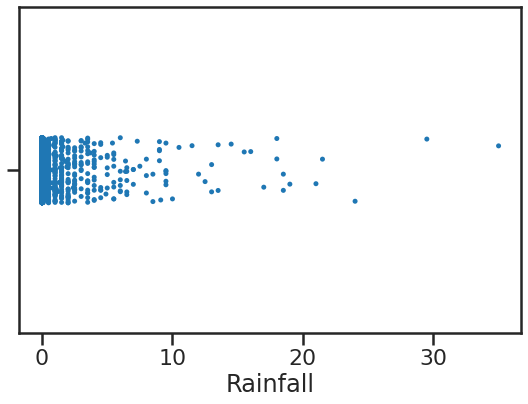

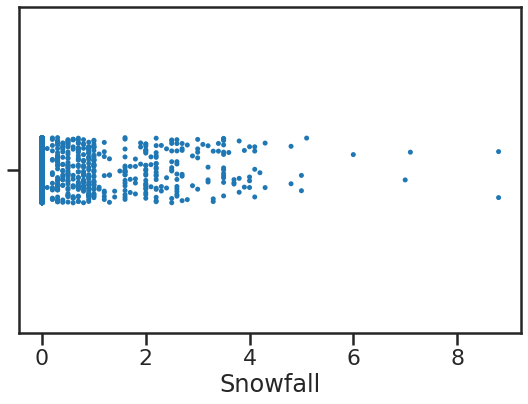

In [235]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns 
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I changed the Year column to sring as it shouldn't be treated as numerical column as there are only two type of values and should be treated as categorical column. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Then, I used capping method to change outliers into upper and lower limit instead of trimming where i could have just removed the entire data.

Another way to do it is dropping extreme values.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

Identifying which columns in a dataset have a symmetric distribution can be useful because it can give you insight into the overall shape of the distribution of values in each column. For example, if a column has a symmetric distribution, it may be more likely to have a bell-shaped curve when plotted on a histogram. This can be useful to know because certain statistical techniques and machine learning algorithms assume that the data is normally distributed, and having a symmetric distribution is one indication that the data may be approximately normally distributed. On the other hand, if a column has a non-symmetric distribution, it may be more likely to be skewed in one direction or the other, which could affect the validity of certain statistical tests or the performance of certain machine learning models.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

* lower inner fence: Q1–1.5*IQ
* upper inner fence: Q3 + 1.5*IQ
* lower outer fence: Q1–3*IQ
* upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [236]:
# Encode your categorical columns
cat_category = df.select_dtypes(include = 'object')
print(f'Categorial Features: {cat_category.columns.to_list()}')

Categorial Features: ['Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Year', 'Week', 'Time_Period']


In [237]:
dff = df.copy()

In [238]:
dd = df.copy()

In [239]:
#applying label encoder to label categorial features
#lable encoder encodes categorial variable as 0,1,2.....
# df = df.apply(LabelEncoder().fit_transform)
dd = dd.apply(LabelEncoder().fit_transform)
# dff = pd.get_dummies(dff, drop_first = True)
dd.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Year,Week,Time_Period
0,253,0,111,28,22,1788,114,0,0,0,3,1,1,4,4,0,1,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there were not much of different unique categories in each categorial feature, I used one hot encoding using labelencoder function which simply converts each feature into 0 and 1.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [240]:
# Expand Contraction

#### 2. Lower Casing

In [241]:
# Lower Casing

#### 3. Removing Punctuations

In [242]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [243]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [244]:
# Remove Stopwords

In [245]:
# Remove White spaces

#### 6. Rephrase Text

In [246]:
# Rephrase Text

#### 7. Tokenization

In [247]:
# Tokenization

#### 8. Text Normalization

In [248]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [249]:
# POS Taging

#### 10. Text Vectorization

In [250]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

* Absolute humidity is the mass of water vapor in a given volume of air, while relative humidity is the percentage of water vapor in the air compared to the maximum amount of water vapor that the air can hold at a particular temperature.

* Hence using the two column temperature and dewpoint calculating absolute humidity, as a new feature as both of them were showing high correlation.

In [251]:
#creating function to use dew point and temperature to calculate absolute humidity
import math

def absolute_humidity(df, temperature_column, dew_point_column):
  # constants
  a = 17.27
  b = 237.7
  
  # create a new column for absolute humidity
  df['Absolute_Humidity'] = None
  
  # iterate over the rows of the DataFrame
  for index, row in df.iterrows():
    temperature = row[temperature_column]
    dew_point = row[dew_point_column]
    
    # check for dew point equal to or higher than temperature
    if dew_point >= temperature:
      # set absolute humidity to zero to prevent division by zero
      df.at[index, 'Absolute_Humidity'] = 0.0
    else:
      # calculate saturation vapor pressure
      svp = (a * dew_point) / (b + dew_point)
      
      # check for temperature equal to zero
      if temperature == 0:
        # set absolute humidity to zero to prevent division by zero
        df.at[index, 'Absolute_Humidity'] = 0.0
      else:
        # calculate absolute humidity
        ah = 6.112 * svp * math.exp((a * temperature) / (b + temperature)) / temperature
        
        # store the absolute humidity in the new column
        df.at[index, 'Absolute_Humidity'] = ah
    
  return df


In [252]:
#calling function
# dff = absolute_humidity(dff, 'Temperature', 'Dew_point_temperature')
dd = absolute_humidity(dd, 'Temperature', 'Dew_point_temperature')

⚡ When dummies are used for creating new feature they get data type of uint8 which means an unsigned integer is a non-negative integer that can hold only positive values and zero. The range of values that an uint8 type can represent is from 0 to 255.

In [253]:
# u8 = dff.select_dtypes(include = 'uint8')

In [254]:
#changing data type as there was an error while using isinf
# dff['Absolute_Humidity'] = dff.Absolute_Humidity.astype('int')
dd['Absolute_Humidity'] = dd.Absolute_Humidity.astype('int')

In [255]:
# np.isinf(dff).values.sum()
# dff.replace([np.inf, -np.inf], 0, inplace=True)
np.isinf(dd).values.sum()
dd.replace([np.inf, -np.inf], 0, inplace=True)

#### 2. Feature Selection

#####Feature selection by removing columns from a dataset that have a low variance

In [256]:
# Select your features wisely to avoid overfitting
# Checking the shape of dataset
# dff.shape
dd.shape

(8760, 19)

In [257]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns 
          if column not in data.columns[var_thres.get_support()]] #var_thres.get_support() return boolean values on checking condition
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var 

In [258]:
# Calling the function
# df_removed_var=dropping_constant(dff)
df_removed_var=dropping_constant(dd)

Columns dropped: ['Holiday', 'Functioning_Day']


In [259]:
# Checking the shape after feature dropped
df_removed_var.shape

(8760, 17)

In [260]:
# Correlation Heatmap visualization code
corr = df_removed_var.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Month,Day,Year,Week,Time_Period,Absolute_Humidity
Rented_Bike_Count,1.00,0.41,0.56,-0.21,0.12,0.20,0.39,0.29,-0.18,-0.15,-0.27,0.09,-0.01,0.22,0.03,0.09,0.30
Hour,0.41,1.00,0.12,-0.24,0.29,0.10,0.00,0.15,-0.00,-0.02,-0.00,0.00,0.00,0.00,0.00,0.31,0.16
Temperature,0.56,0.12,1.00,0.16,-0.03,0.03,0.91,0.35,0.06,-0.23,-0.34,0.06,-0.02,0.38,0.01,-0.09,0.39
Humidity,-0.21,-0.24,0.16,1.00,-0.34,-0.54,0.54,-0.47,0.33,0.11,-0.12,0.06,-0.01,0.04,0.04,0.22,-0.36
Wind_speed,0.12,0.29,-0.03,-0.34,1.00,0.17,-0.18,0.34,-0.04,-0.01,0.11,-0.05,0.05,-0.00,0.02,-0.18,0.15
Visibility,0.20,0.10,0.03,-0.54,0.17,1.00,-0.18,0.15,-0.23,-0.12,-0.02,0.00,0.04,0.05,-0.03,-0.01,0.19
Dew_point_temperature,0.39,0.00,0.91,0.54,-0.18,-0.18,1.00,0.09,0.17,-0.16,-0.33,0.08,-0.02,0.34,0.03,0.03,0.16
Solar_Radiation,0.29,0.15,0.35,-0.47,0.34,0.15,0.09,1.00,-0.11,-0.08,-0.08,0.00,-0.01,0.13,-0.01,-0.59,0.51
Rainfall,-0.18,-0.00,0.06,0.33,-0.04,-0.23,0.17,-0.11,1.00,0.01,-0.03,-0.03,0.03,0.04,0.02,0.01,-0.06
Snowfall,-0.15,-0.02,-0.23,0.11,-0.01,-0.12,-0.16,-0.08,0.01,1.00,0.16,-0.05,0.04,-0.22,0.03,-0.00,-0.06


#####Multicolinearity

**VIF**

---
* Calculating vif identify the strength of correlation between independent variable and the strength of that correlation.

* Vif starts at 1 and has no upper limit.

* 1-5 : Moderate, No corrective measure

* Greater than 5: Severe, Coefficient and p-value are questionable


---
* Since we already saw in correlation matrix that there are high correlation between temperature and dew point temperature, either deleting or adding up column to make new feature will work to deal with this multicolinearity.

Therefore first calculating variance inflation factor(VIF).


In [261]:
# Manipulate Features to minimize feature correlation
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

In [262]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


Temperature
Humidity
Dew_point_temperature
Year


In [263]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [264]:
correlation(df_removed_var,0.6)

['Dew_point_temperature']

In [265]:
# Getting multicolinear columns and dropping them 
highly_correlated_columns=correlation(df_removed_var,0.6)

  
df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(8760, 16)

In [266]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Month,Day,Year,Week,Time_Period,Absolute_Humidity
Rented_Bike_Count,1.00,0.41,0.56,-0.21,0.12,0.20,0.29,-0.18,-0.15,-0.27,0.09,-0.01,0.22,0.03,0.09,0.30
Hour,0.41,1.00,0.12,-0.24,0.29,0.10,0.15,-0.00,-0.02,-0.00,0.00,0.00,0.00,0.00,0.31,0.16
Temperature,0.56,0.12,1.00,0.16,-0.03,0.03,0.35,0.06,-0.23,-0.34,0.06,-0.02,0.38,0.01,-0.09,0.39
Humidity,-0.21,-0.24,0.16,1.00,-0.34,-0.54,-0.47,0.33,0.11,-0.12,0.06,-0.01,0.04,0.04,0.22,-0.36
Wind_speed,0.12,0.29,-0.03,-0.34,1.00,0.17,0.34,-0.04,-0.01,0.11,-0.05,0.05,-0.00,0.02,-0.18,0.15
Visibility,0.20,0.10,0.03,-0.54,0.17,1.00,0.15,-0.23,-0.12,-0.02,0.00,0.04,0.05,-0.03,-0.01,0.19
Solar_Radiation,0.29,0.15,0.35,-0.47,0.34,0.15,1.00,-0.11,-0.08,-0.08,0.00,-0.01,0.13,-0.01,-0.59,0.51
Rainfall,-0.18,-0.00,0.06,0.33,-0.04,-0.23,-0.11,1.00,0.01,-0.03,-0.03,0.03,0.04,0.02,0.01,-0.06
Snowfall,-0.15,-0.02,-0.23,0.11,-0.01,-0.12,-0.08,0.01,1.00,0.16,-0.05,0.04,-0.22,0.03,-0.00,-0.06
Seasons,-0.27,-0.00,-0.34,-0.12,0.11,-0.02,-0.08,-0.03,0.16,1.00,-0.43,0.00,-0.41,-0.00,0.00,-0.06


In [267]:
#dropped humidity as created new feature
# df_removed = df_removed.drop(columns = ['Humidity'], axis =1)
df_removed = df_removed.drop(columns = ['Humidity','Year'], axis =1)

In [268]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])

Temperature


In [269]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,5.60619
1,Temperature,7.28833
2,Wind_speed,4.87444
3,Visibility,5.80368
4,Solar_Radiation,3.66554
5,Rainfall,1.11424
6,Snowfall,1.09951
7,Seasons,2.85829
8,Month,3.48031
9,Day,3.31281


In [270]:
# After Feature Selection checking the shape left with
df_removed.shape

(8760, 14)

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF. 

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. 

##### Which all features you found important and why?

In [271]:
df_removed.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Month', 'Day',
       'Week', 'Time_Period', 'Absolute_Humidity'],
      dtype='object')

In [272]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the XGBRegressor
  model= XGBRegressor(objective='reg:squarederror')
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # plt.figure(figsize=(12,5))
  # final_df.plot.bar(color='teal')
  return final_df

In [273]:
# Getting feature importance of selected features
pd.options.display.float_format = "{:.5f}".format
randomforest_embedded(x=df_removed.drop(["Rented_Bike_Count"],axis=1),y=df_removed["Rented_Bike_Count"])

,Features,Importances
6,Snowfall,0.00743
2,Wind_speed,0.00797
11,Time_Period,0.00907
9,Day,0.01727
8,Month,0.02104
10,Week,0.03123
3,Visibility,0.03760
12,Absolute_Humidity,0.07894
7,Seasons,0.10450
0,Hour,0.12441


In [274]:
pd.options.display.float_format = "{:.2f}".format

I found 13 feature to be important as they were having low VIF and does not show multicollinearity. However, when checking using embedded method using XGBRegressor found none of them had exact 0 importance value which means each feature had atleast some importance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [275]:
# Transform Your data

### 6. Data Scaling

In [276]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [277]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [278]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [279]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [354]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [355]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [356]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [357]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [358]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [359]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [360]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [361]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [362]:
# Save the File
import joblib

# Save the model to a file
# joblib.dump(model, 'model.joblib')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [363]:
# Load the File and predict unseen data.
# Load the model from the file
# model = joblib.load('model.joblib')

# Use the model to make predictions
# predictions = model.predict(data)


# **Conclusion**

Write the conclusion here.

### ***Hurrah! I have successfully completed my Machine Learning Capstone Project !!!🎯🏆***